<a href="https://colab.research.google.com/github/jasinwi22034/ML_HotelBookingPrediction/blob/main/DataExplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Einleitung

In der heutigen dynamischen Hotelbranche kann die Fähigkeit, Buchungsstornierungen vorherzusagen, von entscheidender Bedeutung für den Erfolg eines Hotels sein. Durch die Analyse von Buchungsdaten und die Anwendung von Vorhersagemodellen können Hotels wichtige Einblicke gewinnen, um Ressourcen effizient zu planen und die Kundenzufriedenheit zu steigern. In diesem Data Exploration Project wird untersucht, wie verschiedene Merkmale von Hotelbuchungen genutzt werden können, um Stornierungen vorherzusagen, und erste Ideen und Ansätze für eine Anwendung in der Hotelbranche diskutiert.

# Beschreibung des Datensatzes

Der vorliegende Datensatz umfasst 36.285 individuelle Datensätze von Hotelbuchungen aus den Jahren 2015 bis 2018. Diese Daten wurden direkt aus realen Hotelbuchungen erhoben, um sicherzustellen, dass die daraus abgeleiteten Vorhersagemodelle authentisch und glaubwürdig sind. Der Datensatz ist vielfältig und enthält eine breite Palette von Merkmalen, darunter Buchungsdetails, Kundeninformationen, Reservierungsspezifikationen und den Status, ob die Reservierung storniert wurde oder nicht.

Zu den Hauptmerkmalen des Datensatzes gehören:

Buchungsdetails: Dies umfasst Informationen wie Anzahl der Übernachtungen (number of week nights, number of weekend nights), Zimmerpreis (average price), Anzahl der Erwachsenen und Kinder (number of adults, number of children) usw.

Kundeninformationen: Hier sind Daten wie Anzahl der vorherigen nicht-stornierten und stornierten Buchungen des Kunden enthalten.

Reservierungsspezifikationen: Dazu gehören Daten wie Art des Zimmers (room type), Verpflegungsoptionen (type of meal), Buchungskanal (Offline/Online), Parkplatzreservierung (car parking space) und Anzahl an Sonderwünschen (special requests).

Buchungsstatus: Diese Spalte gibt an, ob die Buchung storniert wurde oder nicht. Sie dient als Zielvariable für mögliche Vorhersagemodelle.

Der Datensatz wurde am 16.02.2024 von Kaggle heruntergeladen und kann unter folgendem Link gefunden werden: https://www.kaggle.com/datasets/youssefaboelwafa/hotel-booking-cancellation-prediction.

Dieser Datensatz wurde aufgrund seiner Relevanz und seiner potenziellen Auswirkungen auf verschiedene Bereiche ausgewählt. Hotelbuchungen sind ein wichtiger Bestandteil des Hotelmanagements, und die Fähigkeit, Buchungsstornierungen vorherzusagen, kann Hotelmanagern dabei helfen, ihre Ressourcen effizient zu verwalten und ihren Umsatz zu maximieren. Darüber hinaus bietet dieser Datensatz eine breite Palette von Merkmalen, die verschiedene Analyse- und Modellierungstechniken ermöglichen, was ihn ideal für ein Data Exploration Project macht.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# URL zur CSV-Datei
url = 'https://gitlab.com/dataexploration/hotelbookingprediction/-/raw/main/booking.csv'

# Laden der CSV
bookings = pd.read_csv(url)
bookings.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#file_url = 'https://drive.google.com/uc?id=1weEFijrZpyZvaawiwTtAFJvNHhW1Cp3y'
# Laden der Datei in ein Pandas DataFrame
#bookings = pd.read_csv(file_url)
#bookings.head()




# Analyse der Datenqualität

In [ ]:
# Data Cleaning

# Make index start from 1 instead of 0 & drop the old index
bookings.drop(["Booking_ID"], axis=1, inplace=True)
bookings.index = bookings.index + 1

bookings.info()

bookings.describe()

bookings.nunique()

print(bookings.isnull().sum().sort_values(ascending=False))

bookings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 1 to 36285
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number of adults          36285 non-null  int64  
 1   number of children        36285 non-null  int64  
 2   number of weekend nights  36285 non-null  int64  
 3   number of week nights     36285 non-null  int64  
 4   type of meal              36285 non-null  object 
 5   car parking space         36285 non-null  int64  
 6   room type                 36285 non-null  object 
 7   lead time                 36285 non-null  int64  
 8   market segment type       36285 non-null  object 
 9   repeated                  36285 non-null  int64  
 10  P-C                       36285 non-null  int64  
 11  P-not-C                   36285 non-null  int64  
 12  average price             36285 non-null  float64
 13  special requests          36285 non-null  int64  
 14  date o

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
1,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
2,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
3,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
5,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [ ]:
# Data Preprocessing and Converting Data Types


# Converting Text to binary
bookings["booking status"] = bookings["booking status"].replace("Canceled", 1)
bookings["booking status"] = bookings["booking status"].replace("Not_Canceled", 0)
bookings.head()

# Converting floats to int
bookings["average price"] = bookings["average price"].round().astype(int)

# Converting date format into seperate columns

# Überprüfen auf NaN-Werte
nan_dates = bookings[bookings['date of reservation'].isna()]
num_nan_dates = nan_dates.shape[0]
print("Anzahl der NaN-Werte in der Spalte 'date of reservation':", num_nan_dates)

# Überprüfen, wie viele Zeilen das Datum mit "/" getrennt wird
num_slash_dates = bookings['date of reservation'].str.contains('/').sum()

# Überprüfen, wie viele Zeilen das Datum mit "-" getrennt wird
num_dash_dates = bookings['date of reservation'].str.contains('-').sum()

# Anzeigen der Ergebnisse
print("Anzahl der Zeilen mit '/' getrennten Datum:", num_slash_dates)
print("Anzahl der Zeilen mit '-' getrennten Datum:", num_dash_dates)

bookings = bookings[~bookings['date of reservation'].str.contains('-')]
bookings['date of reservation'] = pd.to_datetime(bookings['date of reservation'], errors='coerce')

# Drop the original datetime column
bookings = bookings.drop(columns=["date of reservation"])

# Namings
bookings.rename(columns={'P-C': 'Pre-Cancels'}, inplace=True)
bookings.rename(columns={'P-not-C': 'Pre-Not-Cancels'}, inplace=True)

# Transforming text values to seperate columns (One-Hot-Encoding)
object_columns = bookings.select_dtypes(include=["object"]).columns
bookings = pd.get_dummies(bookings, columns=object_columns)
bookings = bookings.replace({True: 1, False: 0})
bookings.info()

Anzahl der NaN-Werte in der Spalte 'date of reservation': 0
Anzahl der Zeilen mit '/' getrennten Datum: 36248
Anzahl der Zeilen mit '-' getrennten Datum: 37
<class 'pandas.core.frame.DataFrame'>
Int64Index: 36248 entries, 1 to 36285
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   number of adults                   36248 non-null  int64
 1   number of children                 36248 non-null  int64
 2   number of weekend nights           36248 non-null  int64
 3   number of week nights              36248 non-null  int64
 4   car parking space                  36248 non-null  int64
 5   lead time                          36248 non-null  int64
 6   repeated                           36248 non-null  int64
 7   Pre-Cancels                        36248 non-null  int64
 8   Pre-Not-Cancels                    36248 non-null  int64
 9   average price                      36248 non-nu

Die folgenden Datenaufbereitungsschritte wurden durchgeführt, um sicherzustellen, dass der Datensatz für die Modellierung geeignet ist und ein gutes Vorhersagemodell erstellt werden kann:

Umwandlung von Text in Binärwerte:
Die Spalte "booking status" enthielt ursprünglich die Werte "Canceled" und "Not_Canceled". Diese wurden in binäre Werte umgewandelt, wobei "Canceled" als 1 und "Not_Canceled" als 0 codiert wurden. Dies ist erforderlich, da viele Machine-Learning-Algorithmen nur numerische Eingaben verarbeiten können.

Umwandlung von Gleitkommazahlen in Ganzzahlen:
Die Spalte "average price" wurde von Gleitkommazahlen auf Ganzzahlen gerundet und umgewandelt. Dies wurde durchgeführt, um sicherzustellen, dass die Preise als ganze Zahlen vorliegen und das Modell einfacher zu interpretieren ist.

Umwandlung des Datumsformats in separate Spalten:
Die Spalte "date of reservation" wurde ursprünglich im Format "MM/DD/YYYY" gespeichert. Sie wurde in separate Spalten für Tag, Monat und Jahr aufgeteilt, um das Datum besser analysieren zu können und möglicherweise saisonale Trends zu identifizieren. Zuvor wurden fehlende Datumsangaben behandelt und Zeilen mit fehlerhaften Datumsformaten entfernt.

Umbenennung von Spalten:
Die Spalten "P-C" und "P-not-C" wurden in "Pre-Cancels" und "Pre-Not-Cancels" umbenannt, um sie klarer zu kennzeichnen und die Lesbarkeit des Datensatzes zu verbessern.

Transformation von Textwerten in separate Spalten (One-Hot-Encoding):
Die Spalten mit textuellen Werten, wie z. B. die Art der Zimmer, wurden in separate Spalten umgewandelt, wobei für jede Kategorie eine eigene Spalte erstellt wurde. Dies wurde durchgeführt, um kategoriale Variablen in einem Format zu präsentieren, das für Machine-Learning-Algorithmen geeignet ist, und um die Möglichkeit einer breiteren Analyse zu ermöglichen.

# Darstellung der Balanciertheit

Anzahl der Zeilen für 'storniert': 11882
Anzahl der Zeilen für 'nicht storniert': 24366


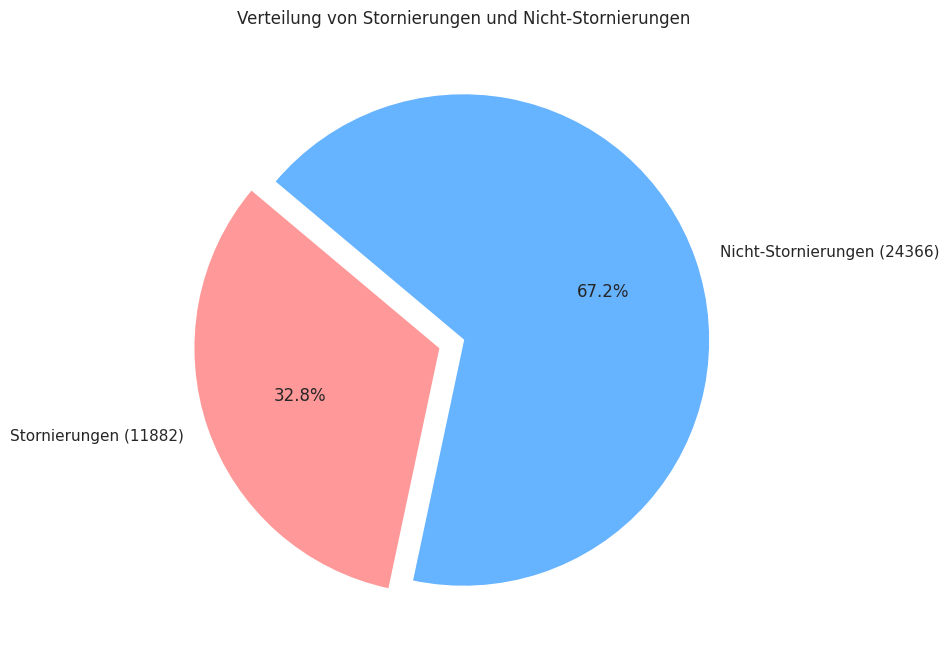

In [ ]:
# Zählen der Anzahl von Stornierungen und Nicht-Stornierungen
cancelled_counts = bookings[bookings['booking status'] == 1].shape[0]
not_cancelled_counts = bookings[bookings['booking status'] == 0].shape[0]
print("Anzahl der Zeilen für 'storniert':", cancelled_counts)
print("Anzahl der Zeilen für 'nicht storniert':", not_cancelled_counts)
# Erstellen des Kreisdiagramms
plt.figure(figsize=(8, 8))

# Definieren von Farben für die Sektionen
colors = ['#ff9999', '#66b3ff']

# Explodieren der Stornierungen
explode = (0.1, 0)

# Erstellen des Kreisdiagramms mit benutzerdefinierten Farben und Explodieren
plt.pie([cancelled_counts, not_cancelled_counts], labels=[f'Stornierungen ({cancelled_counts})', f'Nicht-Stornierungen ({not_cancelled_counts})'], autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)

# Zentrieren der Texte im Kreisdiagramm
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Verteilung von Stornierungen und Nicht-Stornierungen')

# Speichern des Diagramms
plt.savefig('distribution_status.png', bbox_inches='tight')

plt.show()

Das Kreisdiagramm zeigt die Verteilung von Stornierungen und Nicht-Stornierungen im Datensatz anhand ihrer relativen Häufigkeiten. Die Nicht-Stornierungen machen dabei einen Großteil von 67,2% (24366) aus, während die Stornierungen 32,8% (11882) des Datensatzes ausmachen.

Die Ungleichheit in der Verteilung zwischen Stornierungen und Nicht-Stornierungen deutet darauf hin, dass der Datensatz nicht vollständig ausbalanciert ist. Eine solche Ungleichheit könnte Auswirkungen auf die Leistung von Vorhersagemodellen haben, insbesondere wenn das Modell dazu neigt, die dominierende Klasse (hier Nicht-Stornierungen) über die unterrepräsentierte Klasse (hier Stornierungen) zu bevorzugen.

Es ist wichtig, diese Ungleichheit zu berücksichtigen, da ein unausgewogener Datensatz dazu führen kann, dass das Modell Schwierigkeiten hat, seltene Ereignisse wie Stornierungen korrekt vorherzusagen. Dies kann zu einer Verzerrung der Vorhersagen führen, insbesondere wenn das Ziel darin besteht, Stornierungen genauer zu identifizieren. In solchen Fällen können verschiedene Techniken wie beispielsweise das Oversampling der unterrepräsentierten Klasse, das Undersampling der überrepräsentierten Klasse oder die Anpassung von Modellmetriken verwendet werden, um die Auswirkungen der Ungleichheit zu mildern und die Leistung des Modells zu verbessern.

Bevor solche Techniken angewandt werden, wird nun die Verteilung der Features genauer analysiert.

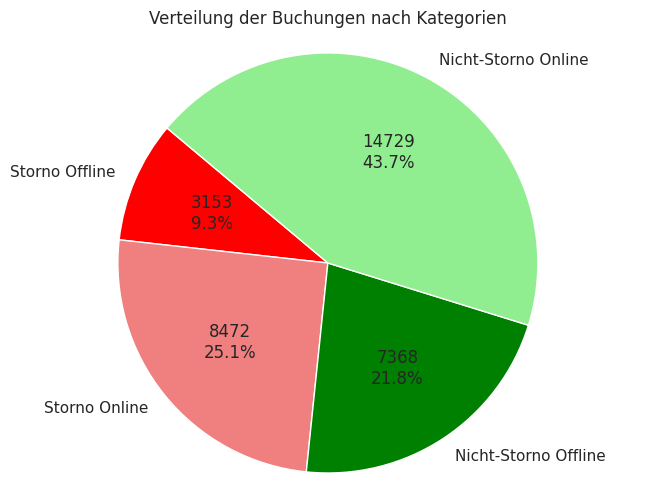

Bedingte Wahrscheinlichkeit für ein Storno bei Online-Buchungen: 0.36515667428128096
Bedingte Wahrscheinlichkeit für ein Storno bei Offline-Buchungen: 0.2996863416025093
Bedingte Wahrscheinlichkeit für Nicht-Storno bei Online-Buchungen: 0.634843325718719
Bedingte Wahrscheinlichkeit für Nicht-Storno bei Offline-Buchungen: 0.7003136583974907


In [ ]:
# Gruppierung der Buchungen nach Kategorien
grouped_bookings = bookings.groupby(['booking status', 'market segment type_Offline', 'market segment type_Online']).size()

# Extrahieren der Anzahl der Buchungen in jeder Gruppe
offline_storno = grouped_bookings[1, 1, 0] if (1, 1, 0) in grouped_bookings.index else 0
online_storno = grouped_bookings[1, 0, 1] if (1, 0, 1) in grouped_bookings.index else 0
offline_non_storno = grouped_bookings[0, 1, 0] if (0, 1, 0) in grouped_bookings.index else 0
online_non_storno = grouped_bookings[0, 0, 1] if (0, 0, 1) in grouped_bookings.index else 0

# Erstellen des Kreisdiagramms
labels = ['Storno Offline', 'Storno Online', 'Nicht-Storno Offline', 'Nicht-Storno Online']
sizes = [offline_storno, online_storno, offline_non_storno, online_non_storno]
colors = ['red', 'lightcoral', 'green', 'lightgreen']

# Funktion zur Anzeige von absoluten Zahlen
def absolute_value(val):
    a = int(round(val/100.*sum(sizes), 0))
    return f'{a}\n{val:.1f}%'

plt.figure(figsize=(8, 6))
wedgeprops = {'linewidth': 1, 'edgecolor': 'white'}
plt.pie(sizes, labels=labels, colors=colors, autopct=absolute_value, startangle=140, wedgeprops=wedgeprops)
plt.title('Verteilung der Buchungen nach Kategorien')
plt.axis('equal')

# Speichern des Diagramms
plt.savefig('booking_distribution.png', bbox_inches='tight')

plt.show()

# Berechnung der bedingten Wahrscheinlichkeiten
prob_storno_online = online_storno / (online_storno + online_non_storno)
prob_storno_offline = offline_storno / (offline_storno + offline_non_storno)
prob_non_storno_online = online_non_storno / (online_storno + online_non_storno)
prob_non_storno_offline = offline_non_storno / (offline_storno + offline_non_storno)

# Ausgabe der berechneten Wahrscheinlichkeiten
print("Bedingte Wahrscheinlichkeit für ein Storno bei Online-Buchungen:", prob_storno_online)
print("Bedingte Wahrscheinlichkeit für ein Storno bei Offline-Buchungen:", prob_storno_offline)
print("Bedingte Wahrscheinlichkeit für Nicht-Storno bei Online-Buchungen:", prob_non_storno_online)
print("Bedingte Wahrscheinlichkeit für Nicht-Storno bei Offline-Buchungen:", prob_non_storno_offline)

Das Kreisdiagramm zeigt die Verteilung der Buchungen nach verschiedenen Kategorien, wobei die Stornierungen weiter in die Bestellkanäle Offline und Online unterteilt sind. Die meisten Buchungen, sowohl stornierte als auch nicht stornierte, erfolgen online. Von den stornierten Buchungen entfallen etwa 25,1% auf den Online-Bestellkanal, während 9,3% auf den Offline-Bestellkanal entfallen. Bei den nicht stornierten Buchungen dominieren ebenfalls die Online-Bestellungen mit 43,7%, gefolgt von den Offline-Bestellungen mit 21,8%.

Eine interessante Erkenntnis, die aus diesem Diagramm gezogen werden kann, ist die bedingte Wahrscheinlichkeit von Stornierungen für beide Kanäle. Die berechneten bedingten Wahrscheinlichkeiten zeigen, dass die Wahrscheinlichkeit für ein Storno bei Online-Buchungen höher ist als bei Offline-Buchungen. Etwa 36,5% der Online-Buchungen enden in einem Storno, während dieser Prozentsatz bei Offline-Buchungen etwa 30% beträgt. Dies legt nahe, dass Online-Buchungen eine höhere Stornowahrscheinlichkeit haben als Offline-Buchungen.

In [ ]:
# Berechnung des Verhältnisses von Stornierungen zu Nicht-Stornierungen
ratio = cancelled_counts / not_cancelled_counts

# Festlegen der Gewichtung der Klassen für ein ausgeglichenes Verhältnis
if ratio > 1:
    class_weights = {'storno': 1, 'nicht_storno': ratio}
else:
    class_weights = {'storno': 1 / ratio, 'nicht_storno': 1}

print("Verhältnis von Stornierungen zu Nicht-Stornierungen:", ratio)
print("Gewichtung der Klassen für ein ausgeglichenes Verhältnis:", class_weights)


Verhältnis von Stornierungen zu Nicht-Stornierungen: 0.48764672084051547
Gewichtung der Klassen für ein ausgeglichenes Verhältnis: {'storno': 2.050664871233799, 'nicht_storno': 1}


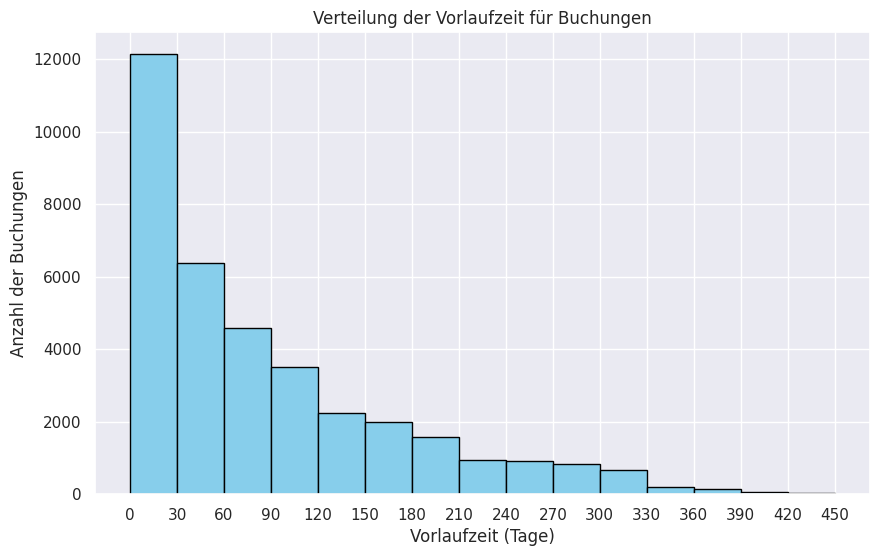

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(bookings['lead time'], bins=15, range=(0, 450), color='skyblue', edgecolor='black')
plt.title('Verteilung der Vorlaufzeit für Buchungen')
plt.xlabel('Vorlaufzeit (Tage)')
plt.ylabel('Anzahl der Buchungen')
plt.xticks(np.arange(0, 451, 30))  # Beschriftung der x-Achse alle 30 Tage
plt.grid(True)

# Speichern des Diagramms
plt.savefig('distribution_leadtime.png', bbox_inches='tight')

plt.show()


Das Balkendiagramm zeigt die Verteilung der Vorlaufzeit für Buchungen in dem Datensatz. Die x-Achse repräsentiert die Vorlaufzeit in Tagen, während die y-Achse die Anzahl der Buchungen angibt. Die Balken zeigen, wie viele Buchungen innerhalb bestimmter Zeitintervalle getätigt wurden.

Die Interpretation des Diagramms zeigt, dass die meisten Buchungen in dem Monat vor dem geplanten Aufenthalt erfolgen. Über 12.000 Buchungen werden im Zeitraum von einem Monat vor dem geplanten Aufenthalt getätigt, gefolgt von über 6.000 Buchungen im Zeitraum von einem Monat bis zwei Monaten vorher und über 4.000 Buchungen im Zeitraum von zwei Monaten bis drei Monaten vorher. Es ist deutlich zu erkennen, dass die Anzahl der Buchungen von Monat zu Monat abnimmt, je weiter der Zeitpunkt des geplanten Aufenthalts in der Zukunft liegt.

Die Ergebnisse aus dem Balkendiagramm entsprechen den Erwartungen und verleihen dem Datensatz Glaubwürdigkeit. Es ist typisch, dass die meisten Buchungen in dem Monat vor dem geplanten Aufenthalt erfolgen, da die meisten Menschen ihre Reisen kurzfristig planen. Diese Erkenntnis unterstützt die Authentizität des Datensatzes und legt nahe, dass er relevante und realistische Informationen über das Buchungsverhalten von Hotelgästen enthält.

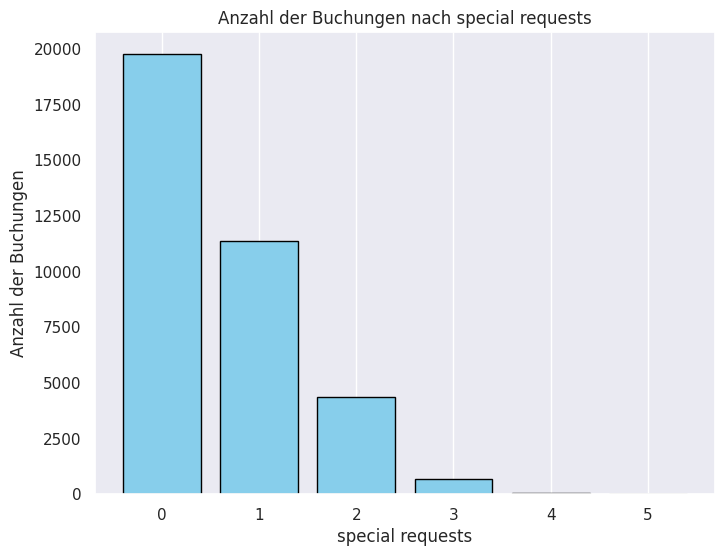

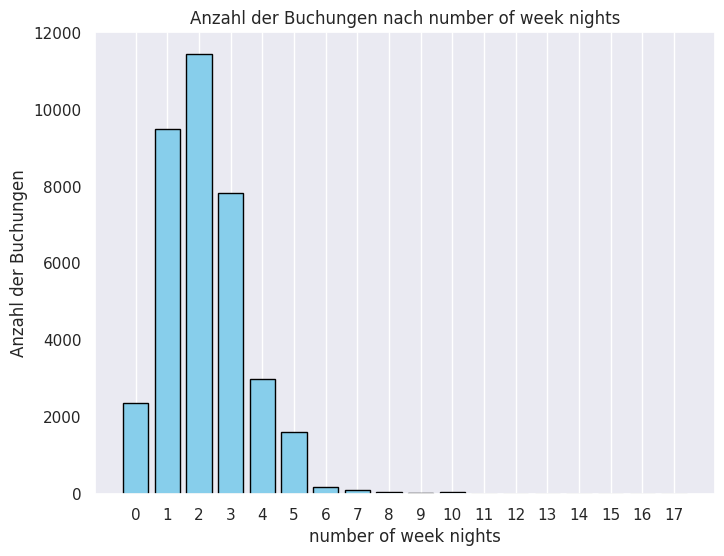

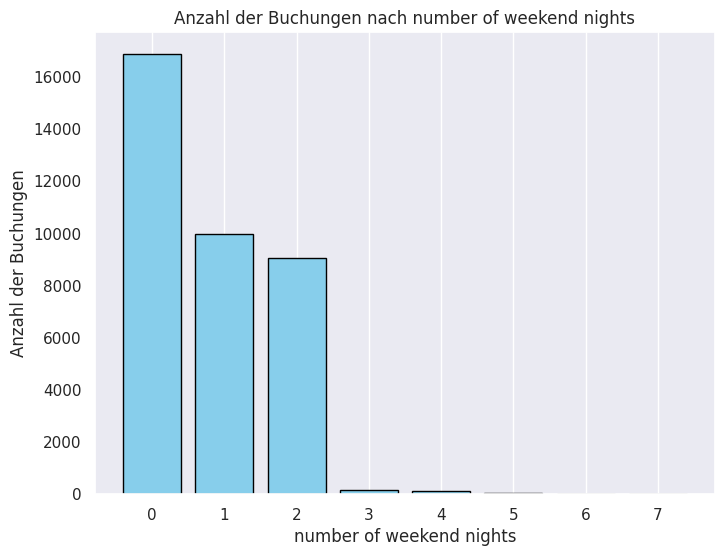

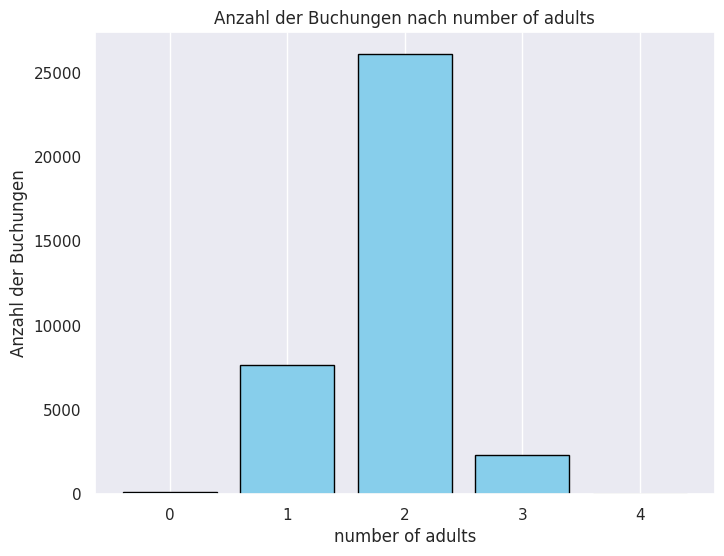

In [ ]:
# Liste der Features für die Balkendiagramme
features = ['special requests', 'number of week nights', 'number of weekend nights', 'number of adults']

# Iteration über jedes Feature
for feature in features:
    # Gruppieren der Buchungen nach dem aktuellen Feature und Zählen der Anzahl von Buchungen in jeder Gruppe
    feature_counts = bookings[feature].value_counts().sort_index()

    # Erstellen des Balkendiagramms
    plt.figure(figsize=(8, 6))
    plt.bar(feature_counts.index, feature_counts.values, color='skyblue', edgecolor='black')  # Hinzufügen einer Außenlinie
    plt.title(f'Anzahl der Buchungen nach {feature}')
    plt.xlabel(feature)
    plt.ylabel('Anzahl der Buchungen')
    plt.xticks(feature_counts.index)
    plt.grid(axis='y')
    plt.savefig(f'distribution_{feature}.png', bbox_inches='tight')
    plt.show()

Dasselbe scheint auch für die restlichen Features zu gelten, die im Folgenden noch näher betrachtet werden. Die Features zeigen, dass die meisten Hotelbuchungen auf eher kürzere Aufenthalte von 1-3 Erachsenen zurückzuführen sind. Die wenigen Ausreißer scheinen hier jedoch trotzdem plausibel, da es in der Realität mit Sicherheit auch wenige längere Aufenthalte von ca. 2 Wochen geben kann, besonders in typischen Urlaubszeiten.

In [ ]:
bookings_zero_adults = bookings[bookings['number of adults'] == 0]
bookings_zero_adults.head()
print("Anzahl der Datensätze mit 0 Erwachsenen:", len(bookings_zero_adults))



Anzahl der Datensätze mit 0 Erwachsenen: 139


# Korrigieren der Balanciertheit (Upsampling)

In [ ]:
from sklearn.utils import resample

# Aufteilen des Datensatzes in Storno und Nicht-Storno
stornos = bookings[bookings['booking status'] == 1]
nicht_stornos = bookings[bookings['booking status'] == 0]

# Anzahl der Stornos und Nicht-Stornos
num_stornos = len(stornos)
num_nicht_stornos = len(nicht_stornos)

# Upsampling durchführen (Anzahl der Stornos auf die Anzahl der Nicht-Stornos erhöhen)
stornos_upsampled = resample(stornos, replace=True, n_samples=num_nicht_stornos, random_state=42)

# Den neu abgetasteten Datensatz zusammenführen
bookings_upsampled = pd.concat([nicht_stornos, stornos_upsampled])

# Anzeigen der Verteilung der Klassen nach dem Upsampling
bookings_upsampled['booking status'].value_counts()


0    24366
1    24366
Name: booking status, dtype: int64

# Feature Engineering

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Aufteilen in Merkmale und Zielvariable
X = bookings.drop('booking status', axis=1)
y = bookings['booking status']

# Initialisierung des Random Forest Klassifikators
rf_classifier = RandomForestClassifier()

# Trainieren des Modells
rf_classifier.fit(X, y)

# Extrahieren der Feature-Importance
feature_importance_rf = rf_classifier.feature_importances_

# Anzeige der Feature-Importance
feature_importance_bookings = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance_rf})
feature_importance_bookings = feature_importance_bookings.sort_values(by='Importance', ascending=False)
print(feature_importance_bookings)

# Ermittlung der wichtigsten Features

# Initialisierung der Summe und des Index
sum_importances = 0
n = 0

# Schleife zum Aufsummieren der importances bis zur Summe über 0.9
for index, row in feature_importance_bookings.iterrows():
    sum_importances += row['Importance']
    n += 1
    if sum_importances >= 0.93:
        break

print("Anzahl wichtigster Features:", n)
print("Summe der wichtigsten Feature-Importance-Werte:", sum_importances)
print(feature_importance_bookings[:n])



                              Feature  Importance
5                           lead time    0.423919
9                       average price    0.226583
10                   special requests    0.110563
3               number of week nights    0.065017
2            number of weekend nights    0.042909
26         market segment type_Online    0.027768
0                    number of adults    0.025497
25        market segment type_Offline    0.014955
12           type of meal_Meal Plan 2    0.007963
1                  number of children    0.007709
4                   car parking space    0.007423
11           type of meal_Meal Plan 1    0.006376
15              room type_Room_Type 1    0.006139
24      market segment type_Corporate    0.005375
18              room type_Room_Type 4    0.005373
14          type of meal_Not Selected    0.004536
6                            repeated    0.003326
16              room type_Room_Type 2    0.002028
8                     Pre-Not-Cancels    0.001591


Die Ermittlung der Feature-Importance ist ein entscheidender Schritt in der Analyse von Datensätzen, insbesondere in Machine Learning Projekten. Durch die Bestimmung der Feature-Importance können wir verstehen, welche Merkmale oder Variablen in einem Datensatz am stärksten zur Vorhersage des Zielwerts beitragen. Dies ermöglicht es uns, die relevantesten Informationen zu identifizieren und die Modellkomplexität zu reduzieren, indem wir uns auf die wichtigsten Merkmale konzentrieren.

In diesem Projekt wird die Feature-Importance mithilfe eines Random Forest Classifiers berechnet. Random Forest ist ein leistungsstarkes Ensemble-Lernverfahren, das auf der Aggregation mehrerer Entscheidungsbäume basiert. Es eignet sich gut für die Bestimmung der Feature-Importance, da es natürlicherweise die Relevanz verschiedener Merkmale während des Trainingsprozesses bewertet.

Die festgelegte Anforderung einer Feature-Abdeckung von mindestens 93% für dieses Projekt zielt darauf ab, sicherzustellen, dass unser Modell einen Großteil der relevanten Informationen im Datensatz berücksichtigt. Diese Entscheidung könnte in der Realität nach Rücksprache mit Fachleuten aus der Hotellerie getroffen werden, um sicherzustellen, dass keine wichtigen Merkmale übersehen werden. Dennoch dient diese pragmatische Festlegung dazu, die Komplexität des Projekts zu reduzieren und klare Richtlinien für die Auswahl der relevanten Merkmale festzulegen.

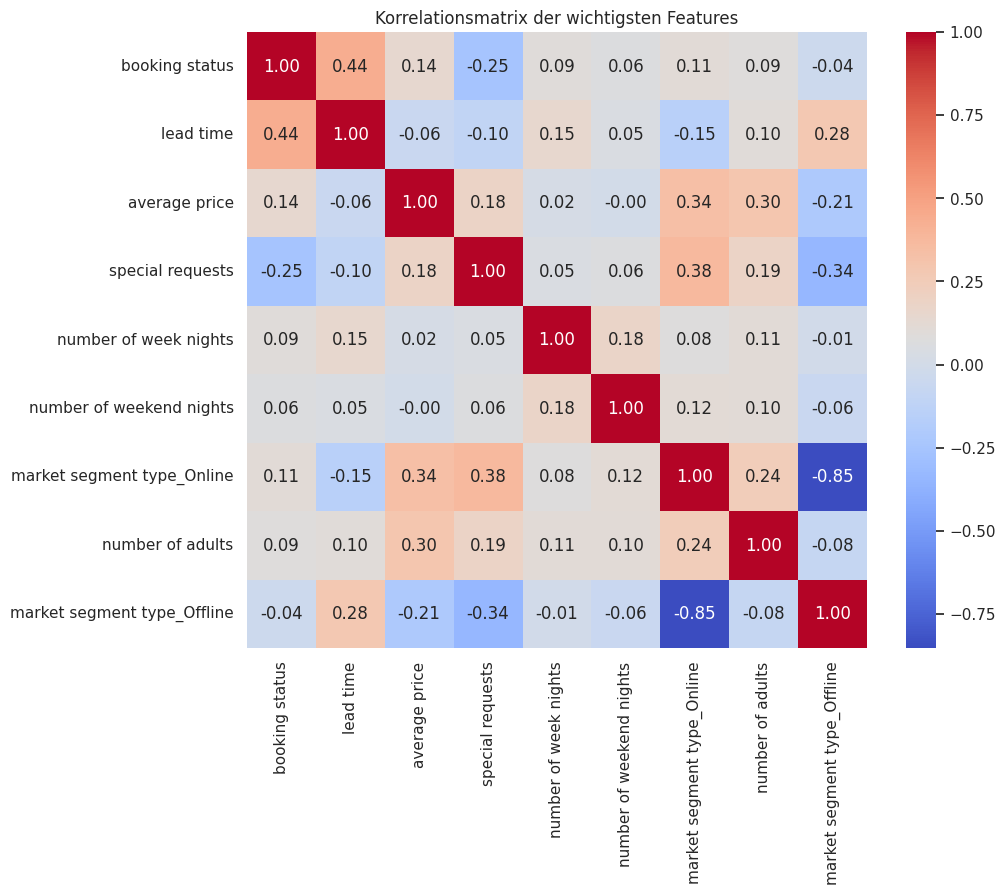

In [ ]:
# Auswahl der wichtigsten Features
top_features = feature_importance_bookings.head(n)['Feature'].tolist()
top_features.insert(0, 'booking status')
# Auswahl der entsprechenden Spalten des ursprünglichen Datenrahmens
bookings = bookings[top_features]

# Berechnung der Korrelationsmatrix
correlation_matrix = bookings.corr()

# Visualisierung der Korrelationsmatrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korrelationsmatrix der wichtigsten Features')
plt.savefig('correlationmatrix.png', bbox_inches='tight')
plt.show()


Die Untersuchung der Korrelationen zwischen den Features ist besonders interessant, um Zusammenhänge im Datensatz zu verstehen, insbesondere in Bezug auf den Buchungsstatus (Storno oder nicht). Ein Blick auf die Korrelationsmatrix zeigt, dass die Vorlaufzeit der Buchung einen signifikanten Einfluss auf die Stornierungswahrscheinlichkeit hat. Es ist zu beobachten, dass längere Vorlaufzeiten, höhere Preise, mehr gebuchte Nächte und mehr erwachsene Personen alle mit einer erhöhten Stornierungswahrscheinlichkeit einhergehen. Dies legt nahe, dass Kunden tendenziell eher stornieren, wenn sie frühzeitig, teuer, für längere Aufenthalte und für mehr Personen buchen. Eine bemerkenswerte Erkenntnis ist zudem die negative Korrelation zwischen der Anzahl der Sonderwünsche und der Stornierungswahrscheinlichkeit. Dies deutet darauf hin, dass Kunden, die viele Sonderwünsche haben, tendenziell weniger wahrscheinlich stornieren. Möglicherweise liegt dies daran, dass Kunden mit spezifischen Anfragen bereits eine feste Absicht haben, im Hotel zu übernachten, und sich daher weniger wahrscheinlich für eine Stornierung entscheiden.

<Figure size 1000x800 with 0 Axes>

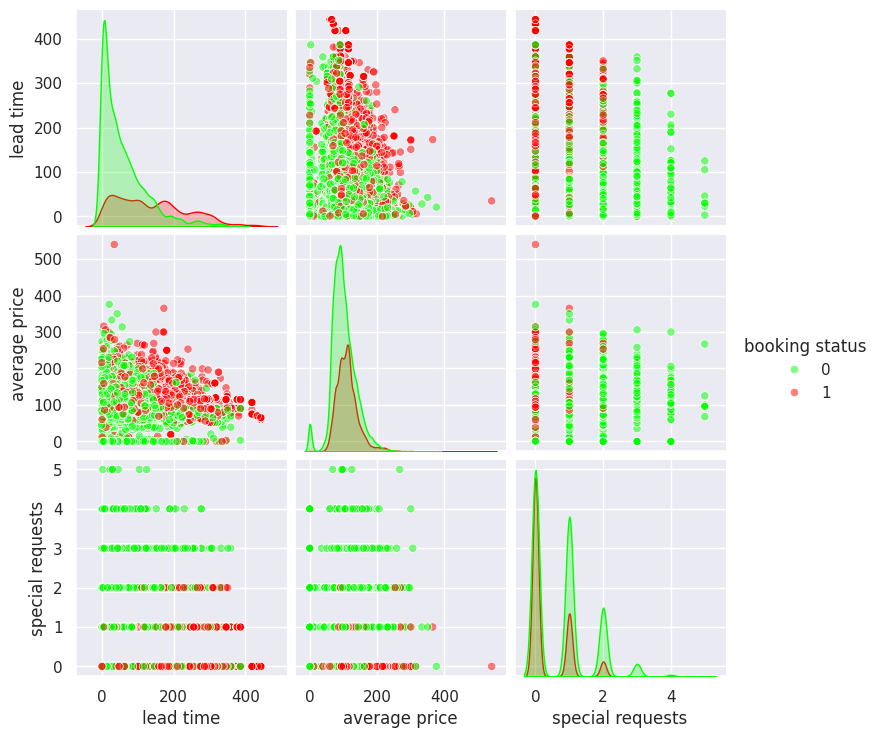

In [ ]:
# Pairplot
custom_palette = {1: (1, 0, 0, 0.5), 0: (0, 1, 0, 0.5)}
plt.figure(figsize=(10, 8))
sns.pairplot(data=bookings, vars=['lead time', 'average price', 'special requests'], hue='booking status', palette=custom_palette)
plt.savefig('pairplot.png', bbox_inches='tight')
plt.show()


# Analyse der Ausreißer

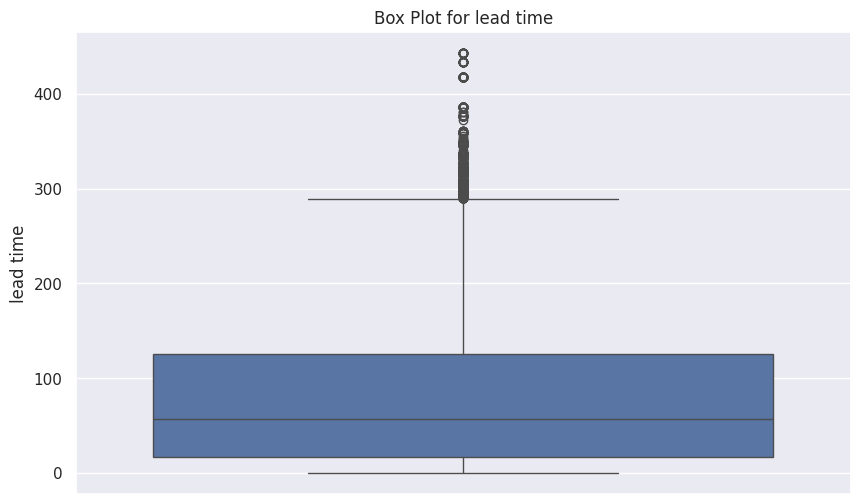

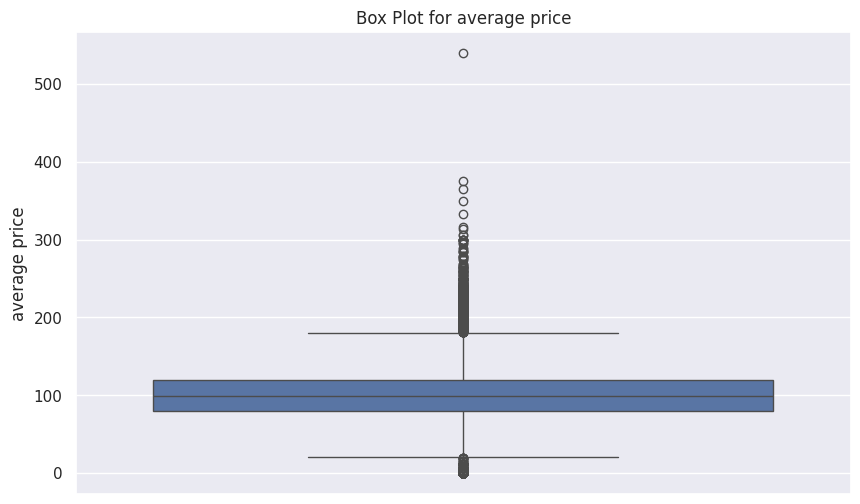

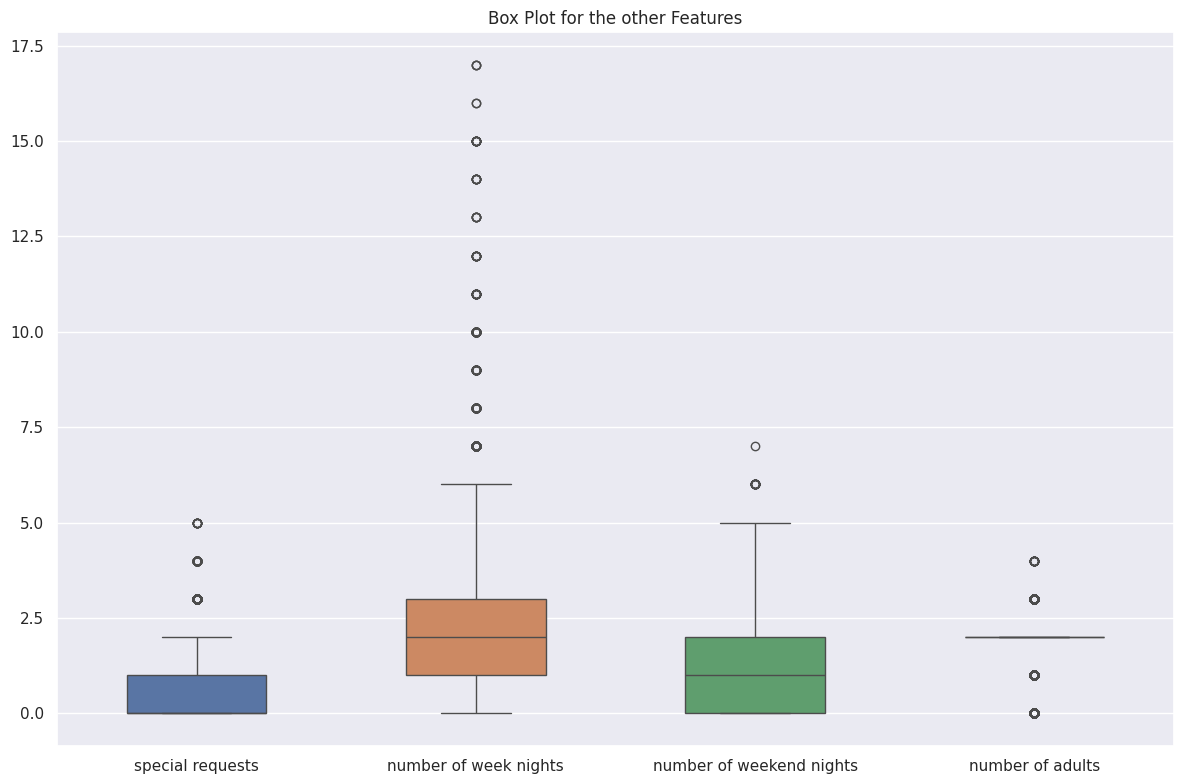

In [ ]:
# Dropping Outliers

# Boxplot vor dem Entfernen der Outliers
# Liste der Spalten, die entfernt werden sollen
exclude_columns = [col for col in bookings.columns if col.startswith(('type of meal', 'room type', 'market segment', 'booking status', 'lead time', 'average price'))]


# DataFrame ohne die ausgeschlossenen Spalten erstellen
bookings_boxplot = bookings.drop(columns=exclude_columns)

# Erstellen des Boxplots
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.boxplot(data=bookings['lead time'], orient="v")
plt.title("Box Plot for lead time")
plt.savefig('boxplot_leadtime.png', bbox_inches='tight')
plt.show()

# Erstellen des Boxplots
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.boxplot(data=bookings['average price'], orient="v")
plt.title("Box Plot for average price")
plt.savefig('boxplot_price.png', bbox_inches='tight')
plt.show()

# Erstellen des Boxplots für die anderen Features
plt.figure(figsize=(12, 8))
sns.set(style="darkgrid")
sns.boxplot(data=bookings_boxplot, orient="v", width=0.5)  # Ändern Sie die Balkenbreite für eine bessere Zentrierung
plt.title("Box Plot for the other Features")
plt.xticks(rotation=0)  # Rotieren Sie die Beschriftungen für bessere Lesbarkeit
plt.tight_layout()  # Anpassen des Layouts für bessere Platzierung der Beschriftungen
plt.savefig(f'boxplot_otherFeatures.png')
plt.show()


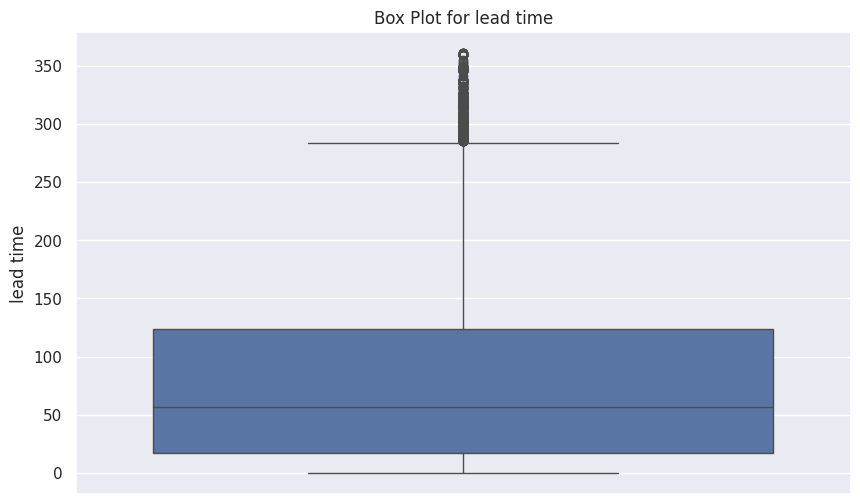

In [ ]:
# Dropping Outliers
bookings_old = bookings

# Entfernen von Datensätzen mit "lead time" über 365 Tagen
bookings = bookings[bookings['lead time'] <= 365]

# Ausreißer per Quantile
# outlier_columns = ["lead time", "average price"]
# for column in outlier_columns:
    # if bookings[column].dtype in ["int64", "float64"]:
    #     q1 = bookings[column].quantile(0.25)
    #     q3 = bookings[column].quantile(0.75)
    #     diff_q3q1 = q3 - q1
    #     lower_bound = q1 - 1.5 * diff_q3q1
    #     upper_bound = q3 + 1.5 * diff_q3q1
    #     bookings = bookings[
    #         (bookings[column] >= lower_bound) & (bookings[column] <= upper_bound)
    #     ]

# Create box plots for every variable after dropping outliers
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.boxplot(data=bookings['lead time'], orient="v")
plt.title("Box Plot for lead time")
plt.savefig('boxplot_leadtime2.png', bbox_inches='tight')
plt.show()

# Splitten des Datensatzes
! Hier bitte definieren, ob gesampelte Daten genutzt werden sollen oder nicht!

In [ ]:
from sklearn.model_selection import train_test_split

# Wählen Sie den gewünschten Datensatz aus (unveränderte Daten, upgesampelte Daten oder undersampelte Daten)
dataset_choice = "upsampled"  # Ändern Sie dies je nach Bedarf ("original", "upsampled" oder "undersampled")

if dataset_choice == "original":
    X = bookings.drop('booking status', axis=1)
    y = bookings['booking status']
elif dataset_choice == "upsampled":
    X = bookings_upsampled.drop('booking status', axis=1)
    y = bookings_upsampled['booking status']
elif dataset_choice == "undersampled":
    X = bookings_undersampled.drop('booking status', axis=1) # (Für undersampled bitte Chunk im Archiv ausführen)
    y = bookings_undersampled['booking status']
else:
    raise ValueError("Invalid dataset choice. Please choose either 'original', 'upsampled', or 'undersampled'.")

# Aufteilen der Daten in Trainings- und Testdaten (80% Trainingsdaten, 20% Testdaten)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aufteilen der Testdaten in Testdaten und Validierungsdaten (50% Testdaten, 50% Validierungsdaten)
#X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Auswahl der Metriken

Für die Optimierung des Modells wird der F1-Score als Metrik gewählt, da er ein ausgewogenes Maß für Precision und Recall bietet. Bei der Vorhersage von Buchungsstornierungen ist es entscheidend, sowohl wahre Stornierungen korrekt zu identifizieren (Recall), um potenzielle Umsatzverluste zu minimieren, als auch falsche Stornierungsvorhersagen zu reduzieren (Precision), um unnötige Kosten zu vermeiden. Die ausschließliche Optimierung von Precision oder Recall könnte zu einem Ungleichgewicht führen, das entweder zu vielen falsch vorhergesagten Stornierungen oder zu vielen nicht erkannten Stornierungen führt, was beide unerwünschte Folgen hat. Der F1-Score ermöglicht eine ausgewogene Bewertung, um diesen Herausforderungen zu begegnen.

# Ermittlung geeigneter ML Classifier

In [ ]:
from sklearn.metrics import f1_score
# Funktion für das Erstellen von ML Modellen inkl. Evaluierungsdarstellung
def train_predict_evaluate(model, X_train, X_test, y_train, y_test, cmap, pathSave):
    # Training des Modells
    model.fit(X_train, y_train)

    # Vorhersage auf den Testdaten
    y_pred = model.predict(X_test)

    # Ausgabe des Klassifikationsberichts
    print(classification_report(y_test, y_pred))

    # Berechnung des F1-Scores
    f1 = f1_score(y_test, y_pred)
    print("F1-Score:", f1)

    # Berechnung der Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Berechnung der prozentualen Werte unter den absoluten Häufigkeiten jedes Quadranten
    total_samples = np.sum(conf_matrix)
    conf_matrix_percent = conf_matrix / total_samples * 100

    # Erstellung der kombinierten Matrix mit den Klassifizierungen und prozentualen Werten
    combined_matrix = np.empty((conf_matrix.shape[0], conf_matrix.shape[1]), dtype=object)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            if i == 0 and j == 0:
                combined_matrix[i][j] = f"TN: {conf_matrix[i][j]} ({conf_matrix_percent[i][j]:.2f}%)"
            elif i == 0 and j == 1:
                combined_matrix[i][j] = f"FP: {conf_matrix[i][j]} ({conf_matrix_percent[i][j]:.2f}%)"
            elif i == 1 and j == 0:
                combined_matrix[i][j] = f"FN: {conf_matrix[i][j]} ({conf_matrix_percent[i][j]:.2f}%)"
            else:
                combined_matrix[i][j] = f"TP: {conf_matrix[i][j]} ({conf_matrix_percent[i][j]:.2f}%)"

    # Visualisierung der Confusion Matrix als Heatmap mit absoluten Häufigkeiten, prozentualen Werten und Klassifizierungen
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=combined_matrix, cmap=cmap, fmt='', cbar=False)
    plt.title(f'Confusion Matrix ({type(model).__name__})')
    plt.xlabel('Predicted Booking Status')
    plt.ylabel('True Booking Status')
    plt.savefig(pathSave, bbox_inches='tight')
    plt.show()



              precision    recall  f1-score   support

           0       0.77      0.78      0.77      4803
           1       0.78      0.77      0.78      4944

    accuracy                           0.78      9747
   macro avg       0.78      0.78      0.78      9747
weighted avg       0.78      0.78      0.78      9747

F1-Score: 0.7757774140752864


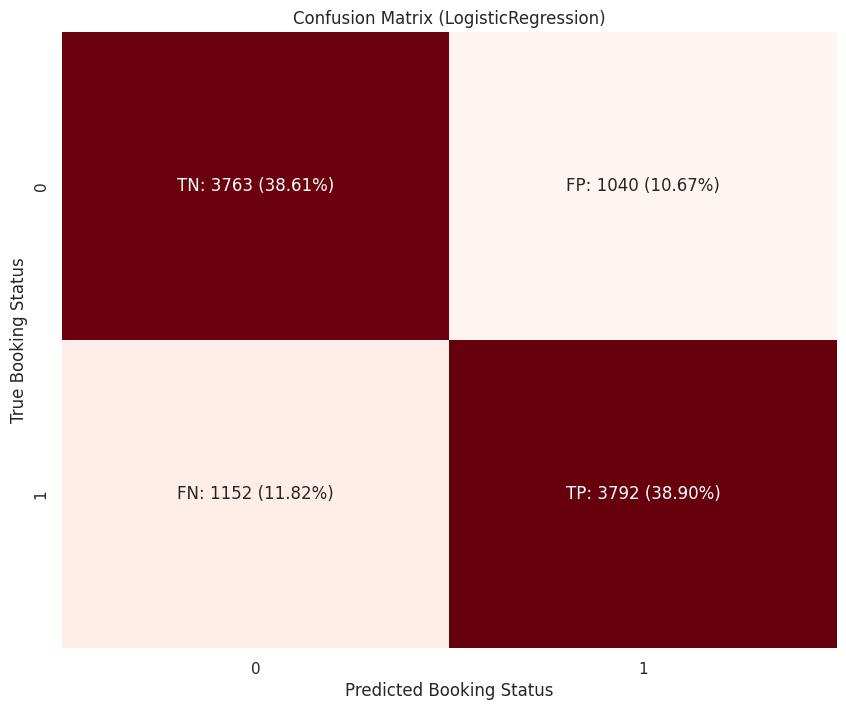

In [ ]:
# Initialisierung des logistischen Regressionsmodells
lr_model = LogisticRegression()

# Anwendung der Funktion auf die logistische Regression
train_predict_evaluate(lr_model, X_train, X_test, y_train, y_test, 'Reds', pathSave='confusionmatrix_Log_upsampled.png')

              precision    recall  f1-score   support

           0       0.85      0.80      0.82      4803
           1       0.81      0.87      0.84      4944

    accuracy                           0.83      9747
   macro avg       0.83      0.83      0.83      9747
weighted avg       0.83      0.83      0.83      9747

F1-Score: 0.8404577912550131


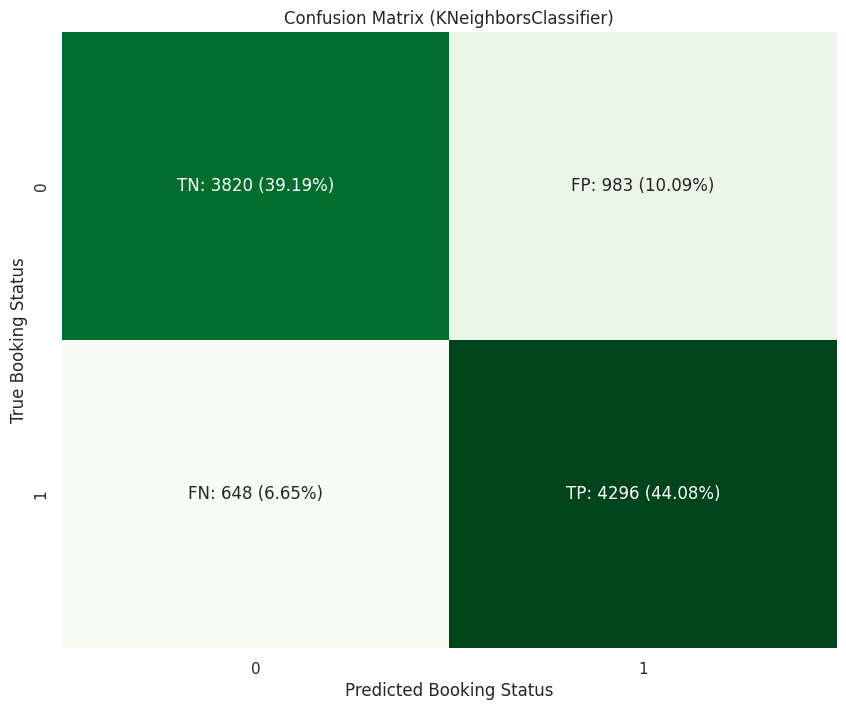

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialisierung des k-NN-Modells
knn_model = KNeighborsClassifier()

# Anwendung der Funktion auf das k-NN-Modell
train_predict_evaluate(knn_model, X_train, X_test, y_train, y_test, 'Greens', pathSave='confusionmatrix_kNN_upsampled.png')

              precision    recall  f1-score   support

           0       0.94      0.89      0.92      4803
           1       0.90      0.95      0.92      4944

    accuracy                           0.92      9747
   macro avg       0.92      0.92      0.92      9747
weighted avg       0.92      0.92      0.92      9747

F1-Score: 0.9222298692360632


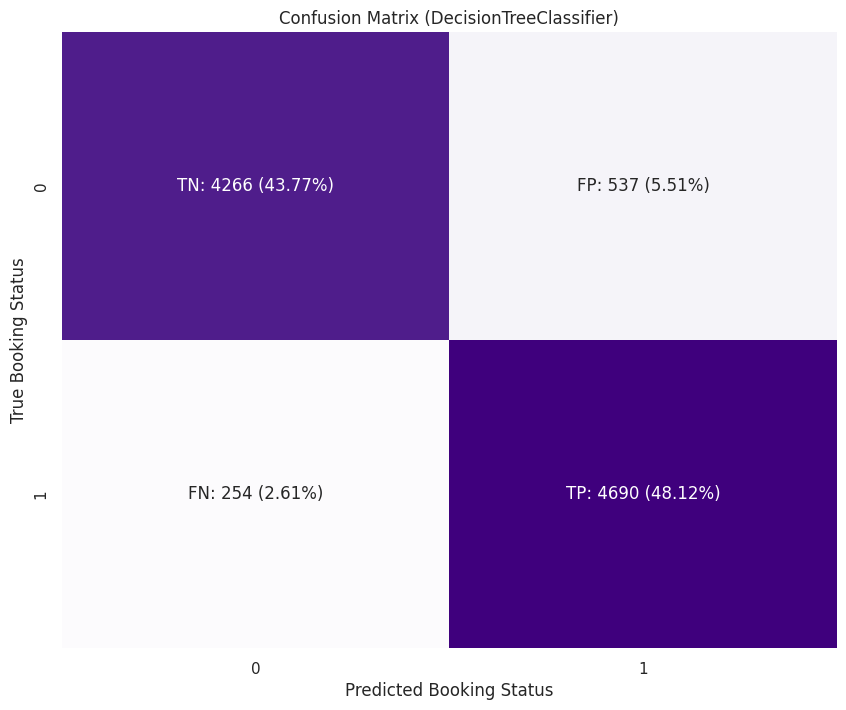

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialisierung des Decision Tree-Modells
dt_model = DecisionTreeClassifier()

# Verwendung der Funktion für Decision Tree
train_predict_evaluate(dt_model, X_train, X_test, y_train, y_test, cmap='Purples', pathSave='confusionmatrix_DecTree_upsampled.png')

              precision    recall  f1-score   support

           0       0.69      0.77      0.73      4803
           1       0.75      0.67      0.71      4944

    accuracy                           0.72      9747
   macro avg       0.72      0.72      0.72      9747
weighted avg       0.72      0.72      0.72      9747

F1-Score: 0.7057185692867851


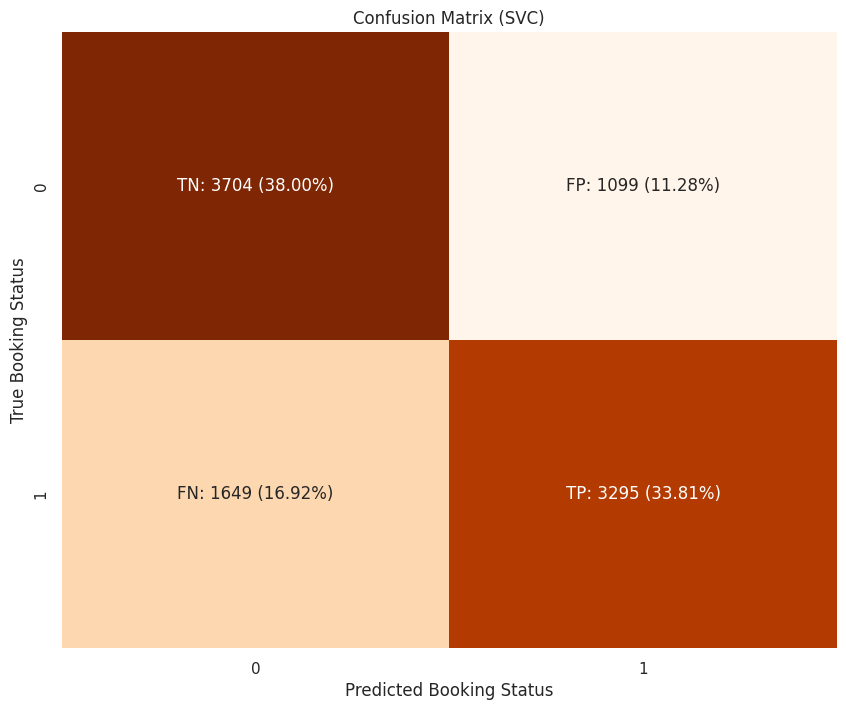

In [ ]:
from sklearn.svm import SVC

# Initialisierung des SVM-Modells
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')

# Verwendung der Funktion für SVM
train_predict_evaluate(svm_model, X_train, X_test, y_train, y_test, cmap='Oranges', pathSave='confusionmatrix_SVM_upsampled.png')


              precision    recall  f1-score   support

           0       0.80      0.84      0.82      4803
           1       0.84      0.79      0.81      4944

    accuracy                           0.82      9747
   macro avg       0.82      0.82      0.82      9747
weighted avg       0.82      0.82      0.82      9747

F1-Score: 0.8133402813965607


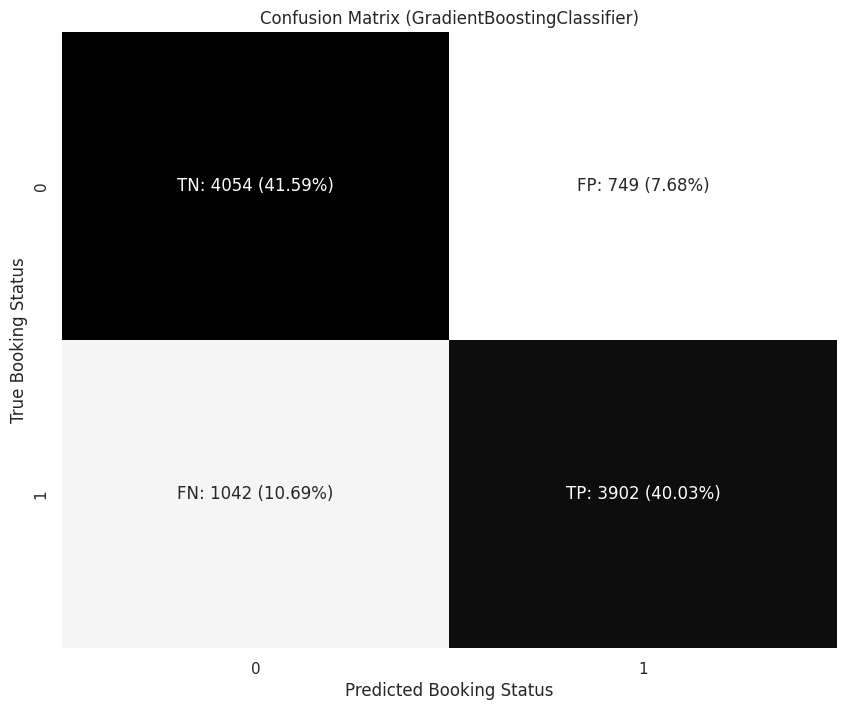

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialisierung des GBM-Modells
gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

# Verwendung der Funktion für GBM
train_predict_evaluate(gbm_model, X_train, X_test, y_train, y_test, cmap='Greys', pathSave='confusionmatrix_GBM_upsampled.png')

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      4803
           1       0.92      0.95      0.94      4944

    accuracy                           0.93      9747
   macro avg       0.93      0.93      0.93      9747
weighted avg       0.93      0.93      0.93      9747

F1-Score: 0.9354358821779232


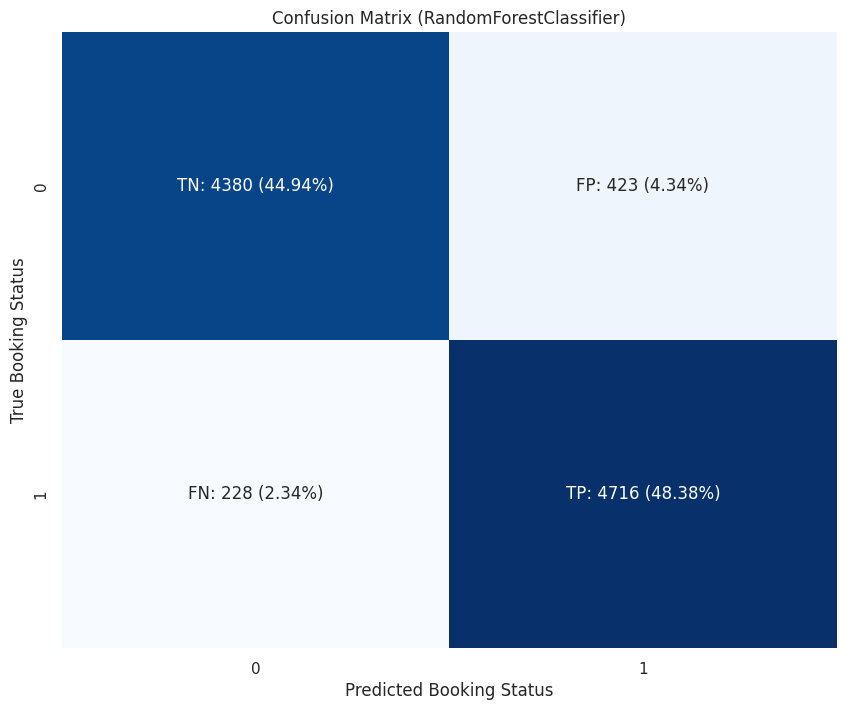

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialisierung des Random Forest-Modells
rf_model = RandomForestClassifier()

# Verwendung der Funktion für Random Forest
train_predict_evaluate(rf_model, X_train, X_test, y_train, y_test, cmap='Blues', pathSave='confusionmatrix_RandomForest_upsampled.png')

Anzahl der Zeilen für 'storniert': 11651
Anzahl der Zeilen für 'nicht storniert': 24354
Storno Gewichtung: 1.5451463393700111
Nicht-Storno Gewichtung: 0.7392009526155867
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      4803
           1       0.91      0.96      0.94      4944

    accuracy                           0.93      9747
   macro avg       0.93      0.93      0.93      9747
weighted avg       0.93      0.93      0.93      9747



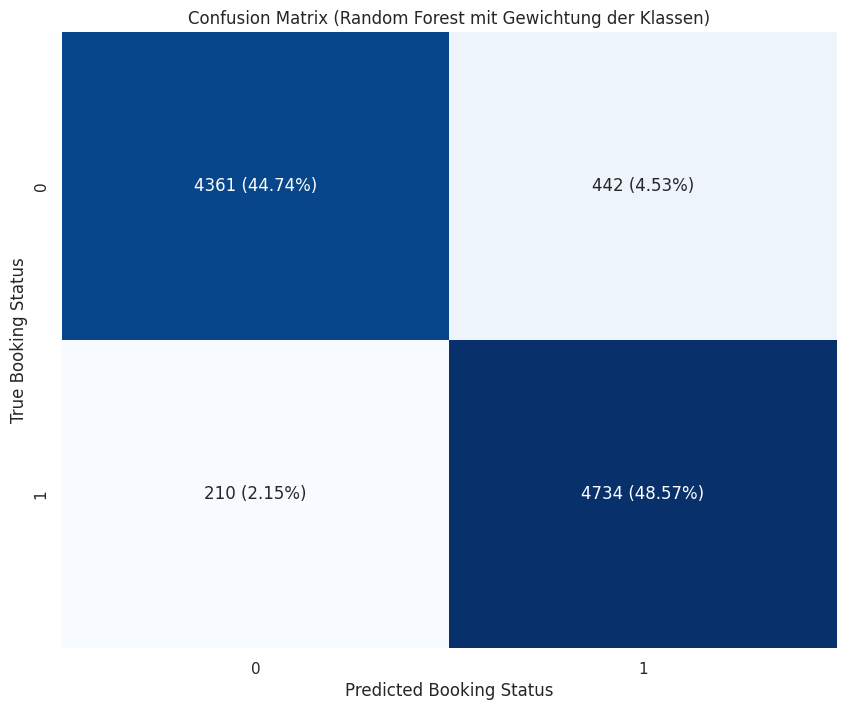

In [ ]:
# Zählen der Anzahl von Stornierungen und Nicht-Stornierungen
cancelled_counts = bookings[bookings['booking status'] == 1].shape[0]
not_cancelled_counts = bookings[bookings['booking status'] == 0].shape[0]

print("Anzahl der Zeilen für 'storniert':", cancelled_counts)
print("Anzahl der Zeilen für 'nicht storniert':", not_cancelled_counts)

# Berechnung des Verhältnisses der beiden Ausprägungen (Storno, Nicht-Storno)
total_samples = cancelled_counts + not_cancelled_counts
class_weight_cancelled = total_samples / (2 * cancelled_counts)
class_weight_not_cancelled = total_samples / (2 * not_cancelled_counts)
print('Storno Gewichtung: ' + str(class_weight_cancelled))
print('Nicht-Storno Gewichtung: ' + str(class_weight_not_cancelled))

# Formatieren der Gewichtung der Klassen als Dictionary
class_weights = {0: class_weight_not_cancelled, 1: class_weight_cancelled}

# Initialisierung und Training des Random Forest-Modells mit Gewichtung der Klassen
rf_model_weighted = RandomForestClassifier(class_weight=class_weights)
rf_model_weighted.fit(X_train, y_train)

# Vorhersage auf den Testdaten
y_pred = rf_model_weighted.predict(X_test)

# Bewertung des Modells
print(classification_report(y_test, y_pred))

# Berechnung der Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Berechnung der prozentualen Werte unter den absoluten Häufigkeiten jedes Quadranten
total_samples = np.sum(conf_matrix)
conf_matrix_percent = conf_matrix / total_samples * 100

# Erstellung der kombinierten Matrix
combined_matrix = np.empty((conf_matrix.shape[0], conf_matrix.shape[1]), dtype=object)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        combined_matrix[i][j] = f"{conf_matrix[i][j]} ({conf_matrix_percent[i][j]:.2f}%)"

# Visualisierung der Confusion Matrix als Heatmap mit absoluten Häufigkeiten und prozentualen Werten
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=combined_matrix, cmap='Blues', fmt='', cbar=False)
plt.title('Confusion Matrix (Random Forest mit Gewichtung der Klassen)')
plt.xlabel('Predicted Booking Status')
plt.ylabel('True Booking Status')
plt.savefig('confusionmatrix_RandomForest_weighted.png', bbox_inches='tight')
plt.show()

# Hyperparameter-Tuning
Anzahl der Datensätze anpassbar (über sample_data) um Funktion zu prüfen

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Bestes Modell: RandomForestClassifier(n_estimators=300)
Beste Hyperparameter: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      4803
           1       0.92      0.95      0.94      4944

    accuracy                           0.93      9747
   macro avg       0.93      0.93      0.93      9747
weighted avg       0.93      0.93      0.93      9747



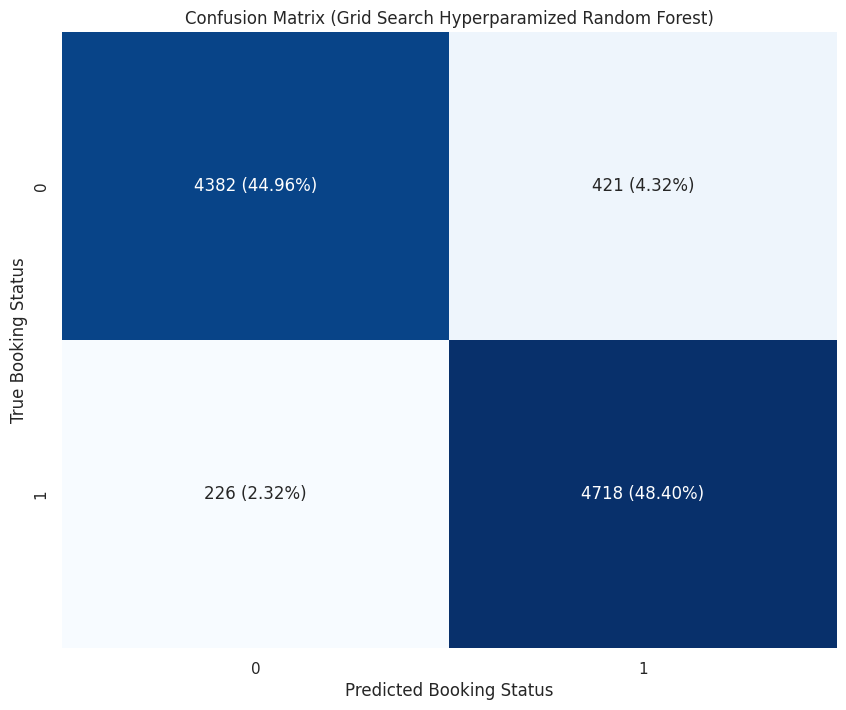

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

sample_data = False  # Schalter für den Wechsel zwischen ursprünglichen und gesampelten Daten

# Größe der Stichprobe definieren
sample_size = 100  # Anpassen der gewünschten Anzahl von Datensätzen

# Zufällige Stichprobe aus dem Trainingsdatensatz ziehen
X_train_sample = X_train.sample(n=sample_size, random_state=42)
y_train_sample = y_train.sample(n=sample_size, random_state=42)

if sample_data:
    X_train_used = X_train_sample
    y_train_used = y_train_sample
else:
    X_train_used = X_train
    y_train_used = y_train

# Definieren Sie den Hyperparameter-Raum
param_grid = {
    'n_estimators': [100, 200, 300],  # Anzahl der Bäume im Wald
    'max_depth': [None, 10, 20],       # Maximale Tiefe jedes Baumes
    'min_samples_split': [2, 5, 10],   # Minimale Anzahl von Beispielen, die erforderlich sind, um einen internen Knoten zu teilen
    'min_samples_leaf': [1, 2, 4]      # Minimale Anzahl von Beispielen in einem Blattknoten
}

# Wählen Sie das Modell aus
rf_model = RandomForestClassifier()

# Definieren Sie die Bewertungsmetrik
scoring = 'f1'

# Erstellen Sie die Grid Search-Instanz
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring=scoring, cv=5, verbose=1)

# Führen Sie die Grid Search durch
grid_search.fit(X_train_used, y_train_used)

# Ausgabe des besten Modells und seiner Hyperparameter
print("Bestes Modell:", grid_search.best_estimator_)
print("Beste Hyperparameter:", grid_search.best_params_)

# Vorhersage auf den Testdaten mit dem besten Modell
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Bewertung des Modells
print(classification_report(y_test, y_pred))

# Berechnung der Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Berechnung der prozentualen Werte unter den absoluten Häufigkeiten jedes Quadranten
total_samples = np.sum(conf_matrix)
conf_matrix_percent = conf_matrix / total_samples * 100

# Erstellung der kombinierten Matrix
combined_matrix = np.empty((conf_matrix.shape[0], conf_matrix.shape[1]), dtype=object)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        combined_matrix[i][j] = f"{conf_matrix[i][j]} ({conf_matrix_percent[i][j]:.2f}%)"

# Visualisierung der Confusion Matrix als Heatmap mit absoluten Häufigkeiten und prozentualen Werten
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=combined_matrix, cmap='Blues', fmt='', cbar=False)
plt.title('Confusion Matrix (Grid Search Hyperparamized Random Forest)')
plt.xlabel('Predicted Booking Status')
plt.ylabel('True Booking Status')
plt.savefig('confusionmatrix_RandomForest_tuned.png', bbox_inches='tight')
plt.show()

# Vorhersage-Demo

In [ ]:
import random

# Simulation einer einzelnen Vorhersage
random_index = random.randint(0, len(X_test) - 1)
random_data = X_test.iloc[random_index]
true_label = y_test.iloc[random_index]

# Vorhersage mit dem trainierten Modell
predicted_label = rf_model.predict([random_data])

# Ausgabe der zufällig ausgewählten Datenpunkte für die wichtigsten Merkmale
important_random_data = random_data[feature_importance_bookings['Feature'][:n]]

print("Zufällig ausgewählter Datenpunkt:")
for feature, value in zip(important_random_data.index, important_random_data):
    print(f"{feature}: {value}")

# Ausgabe der Vorhersage und des wahren Labels
print("----------------------------------")
print("Vorhergesagter Booking Status:", predicted_label)
print("Wahrer Booking Status:", true_label)

Zufällig ausgewählter Datenpunkt:
lead time: 25
average price: 88
special requests: 1
number of week nights: 4
number of weekend nights: 0
number of adults: 2
market segment type_Online: 1
market segment type_Offline: 0
----------------------------------
Vorhergesagter Booking Status: [0]
Wahrer Booking Status: 0


# Archiv

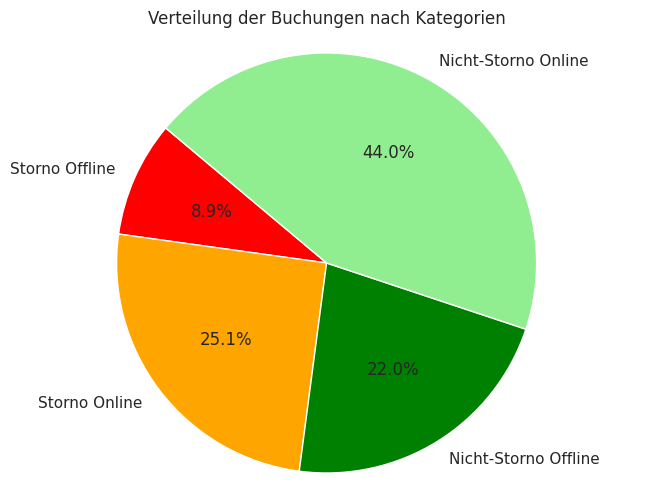

In [ ]:
# Gruppierung der Buchungen nach den Kategorien
grouped_bookings = bookings.groupby(['booking status', 'market segment type_Offline', 'market segment type_Online']).size()

# Extrahieren der Anzahl der Buchungen in jeder Gruppe
offline_storno = grouped_bookings[1, 1, 0] if (1, 1, 0) in grouped_bookings.index else 0
online_storno = grouped_bookings[1, 0, 1] if (1, 0, 1) in grouped_bookings.index else 0
offline_non_storno = grouped_bookings[0, 1, 0] if (0, 1, 0) in grouped_bookings.index else 0
online_non_storno = grouped_bookings[0, 0, 1] if (0, 0, 1) in grouped_bookings.index else 0

# Erstellen des Kreisdiagramms
labels = ['Storno Offline', 'Storno Online', 'Nicht-Storno Offline', 'Nicht-Storno Online']
sizes = [offline_storno, online_storno, offline_non_storno, online_non_storno]
colors = ['red', 'orange', 'green', 'lightgreen']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Verteilung der Buchungen nach Kategorien')
plt.axis('equal')
plt.show()

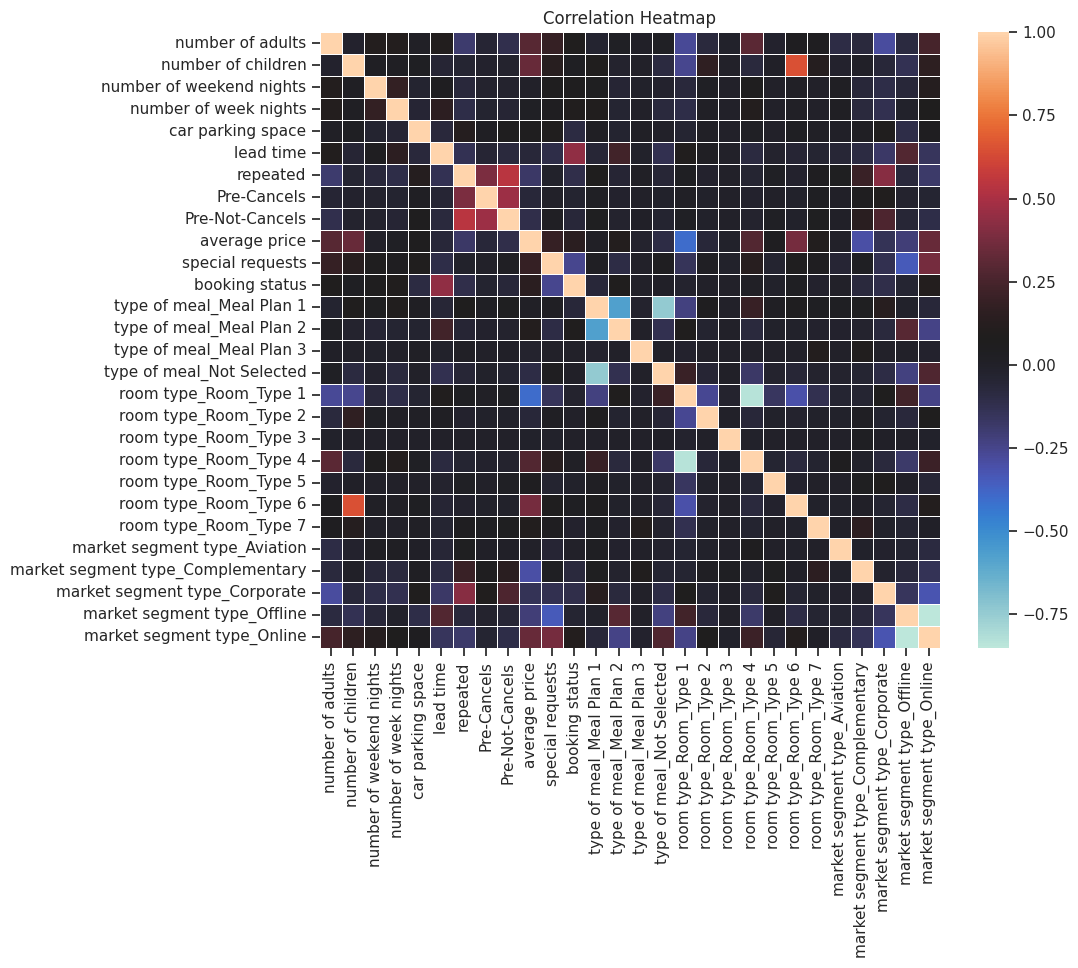

In [ ]:
#bookings.info()

plt.figure(figsize=(10, 8))
sns.heatmap(bookings.corr(), cmap="icefire", linewidths=0.6)
plt.title("Correlation Heatmap")
plt.show()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Bestes Modell: RandomForestClassifier(max_depth=30, min_samples_split=5, n_estimators=99)
Beste Hyperparameter: {'bootstrap': True, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 99}
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4924
           1       0.85      0.77      0.81      2277

    accuracy                           0.88      7201
   macro avg       0.88      0.85      0.86      7201
weighted avg       0.88      0.88      0.88      7201



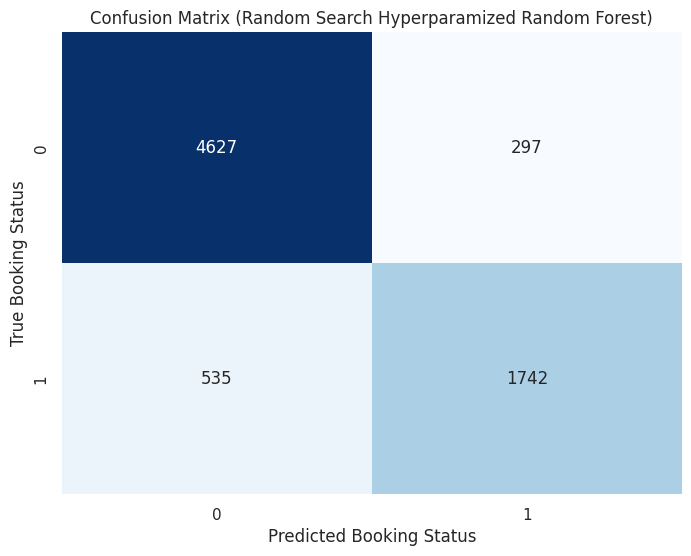

Mean Squared Error (MSE): 0.11553950840161088
Mean Absolute Error (MAE): 0.11553950840161088
Root Mean Squared Error (RMSE): 0.3399110301264301
Mean Absolute Percentage Error (MAPE): 185747686339263.7
R-squared (R2): 0.46563862051447247


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from scipy.stats import randint

# Größe der Stichprobe definieren
#sample_size = 28000  # Anpassen der gewünschten Anzahl von Datensätzen

# Zufällige Stichprobe aus dem Trainingsdatensatz ziehen
#X_train_sample = X_train.sample(n=sample_size, random_state=42)
#y_train_sample = y_train.sample(n=sample_size, random_state=42)

# Definiere den Suchraum für Hyperparameter
param_dist = {
    'n_estimators': randint(50, 500),  # Anzahl der Bäume im Wald
    'max_features': ['auto', 'sqrt', 'log2'],  # Anzahl der Features für die beste Aufteilung
    'max_depth': [10, 20, 30, 40, 50, None],  # Maximale Tiefe der Bäume
    'min_samples_split': randint(2, 20),  # Mindestanzahl der Samples für eine Aufteilung
    'min_samples_leaf': randint(1, 10),  # Mindestanzahl der Samples in einem Blatt
    'bootstrap': [True, False]  # Ob Bootstrap-Stichprobenziehung durchgeführt werden soll
}


# Wählen Sie das Modell aus
rf_model = RandomForestClassifier()

# Definieren Sie die Bewertungsmetrik
scoring = 'f1'

# Erstellen Sie die Randomized Search-Instanz
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, scoring=scoring, cv=5, n_iter=10, random_state=42, n_jobs=-1, verbose=1)

# Führen Sie die Randomized Search durch
random_search.fit(X_train, y_train)

# Ausgabe des besten Modells und seiner Hyperparameter
print("Bestes Modell:", random_search.best_estimator_)
print("Beste Hyperparameter:", random_search.best_params_)

# Vorhersage auf den Testdaten mit dem besten Modell
best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Bewertung des Modells
print(classification_report(y_test, y_pred))

# Berechnung der Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Erstellen der Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix (Random Search Hyperparamized Random Forest)')
plt.xlabel('Predicted Booking Status')
plt.ylabel('True Booking Status')
plt.show()


# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)

# R-squared (R2)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

In [ ]:
from sklearn.utils import resample

# Aufteilen des Datensatzes in Storno und Nicht-Storno
stornos = bookings[bookings['booking status'] == 1]
nicht_stornos = bookings[bookings['booking status'] == 0]

# Anzahl der Stornos und Nicht-Stornos
num_stornos = len(stornos)
num_nicht_stornos = len(nicht_stornos)

# Undersampling durchführen (Anzahl der Nicht-Stornos auf Anzahl der Stornos reduzieren)
nicht_stornos_undersampled = resample(nicht_stornos, replace=False, n_samples=num_stornos, random_state=42)

# Den neu abgetasteten Datensatz zusammenführen
bookings_undersampled = pd.concat([nicht_stornos_undersampled, stornos])

# Anzeigen der Verteilung der Klassen nach dem Undersampling
bookings_undersampled['booking status'].value_counts()


0    11882
1    11882
Name: booking status, dtype: int64

Accuracy: 0.8326664614753257
              precision    recall  f1-score   support

           0       0.85      0.80      0.82      4803
           1       0.81      0.87      0.84      4944

    accuracy                           0.83      9747
   macro avg       0.83      0.83      0.83      9747
weighted avg       0.83      0.83      0.83      9747



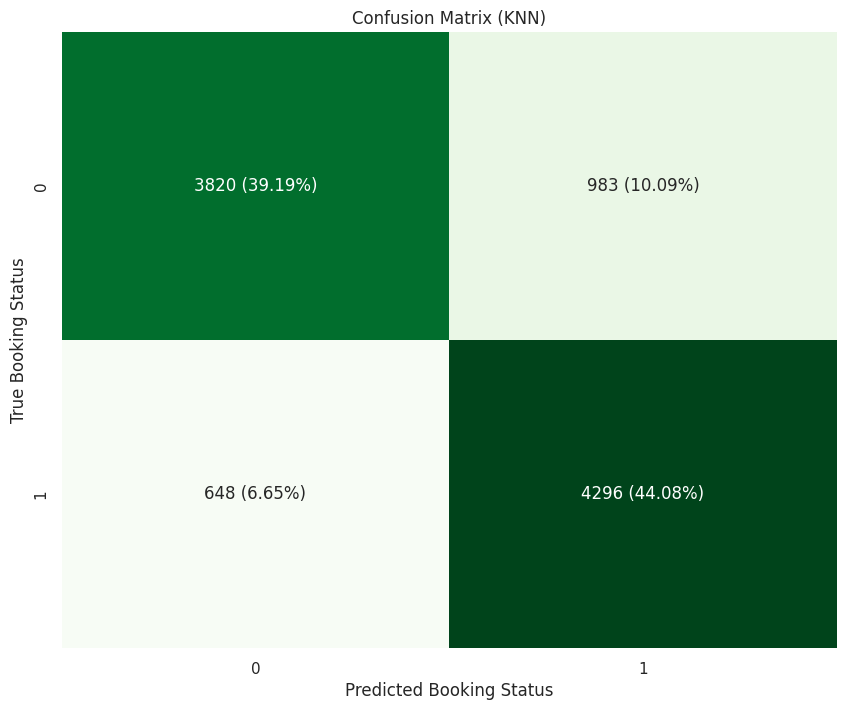

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialisierung und Training des KNN-Modells
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Vorhersage auf den Testdaten
y_pred_knn = knn_model.predict(X_test)

# Bewertung des Modells
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy_knn)
print(classification_report(y_test, y_pred_knn))

# Berechnung der Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Berechnung der prozentualen Werte unter den absoluten Häufigkeiten jedes Quadranten
total_samples = np.sum(conf_matrix_knn)
conf_matrix_knn_percent = conf_matrix_knn / total_samples * 100

# Erstellung der kombinierten Matrix
combined_matrix_knn = np.empty((conf_matrix_knn.shape[0], conf_matrix_knn.shape[1]), dtype=object)
for i in range(conf_matrix_knn.shape[0]):
    for j in range(conf_matrix_knn.shape[1]):
        combined_matrix_knn[i][j] = f"{conf_matrix_knn[i][j]} ({conf_matrix_knn_percent[i][j]:.2f}%)"

# Visualisierung der Confusion Matrix als Heatmap mit absoluten Häufigkeiten und prozentualen Werten
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_knn, annot=combined_matrix_knn, cmap='Greens', fmt='', cbar=False)
plt.title('Confusion Matrix (KNN)')
plt.xlabel('Predicted Booking Status')
plt.ylabel('True Booking Status')
plt.savefig('confusionmatrix_kNN_upsampled.png', bbox_inches='tight')
plt.show()


Accuracy: 0.9188468246639991
              precision    recall  f1-score   support

           0       0.94      0.89      0.92      4803
           1       0.90      0.95      0.92      4944

    accuracy                           0.92      9747
   macro avg       0.92      0.92      0.92      9747
weighted avg       0.92      0.92      0.92      9747



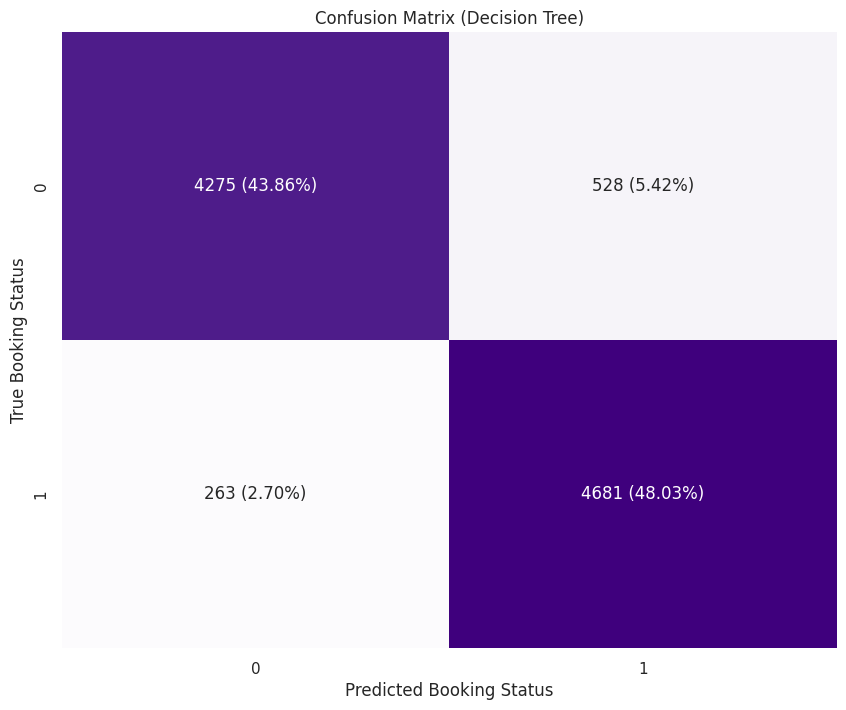

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialisierung und Training des Decision Tree-Modells
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Vorhersage auf den Testdaten
y_pred_dt = dt_model.predict(X_test)

# Bewertung des Modells
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy_dt)
print(classification_report(y_test, y_pred_dt))

# Berechnung der Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Berechnung der prozentualen Werte unter den absoluten Häufigkeiten jedes Quadranten
total_samples = np.sum(conf_matrix_dt)
conf_matrix_dt_percent = conf_matrix_dt / total_samples * 100

# Erstellung der kombinierten Matrix
combined_matrix_dt = np.empty((conf_matrix_dt.shape[0], conf_matrix_dt.shape[1]), dtype=object)
for i in range(conf_matrix_dt.shape[0]):
    for j in range(conf_matrix_dt.shape[1]):
        combined_matrix_dt[i][j] = f"{conf_matrix_dt[i][j]} ({conf_matrix_dt_percent[i][j]:.2f}%)"

# Visualisierung der Confusion Matrix als Heatmap mit absoluten Häufigkeiten und prozentualen Werten
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_dt, annot=combined_matrix_dt, cmap='Purples', fmt='', cbar=False)
plt.title('Confusion Matrix (Decision Tree)')
plt.xlabel('Predicted Booking Status')
plt.ylabel('True Booking Status')
plt.savefig('confusionmatrix_DecTree_upsampled.png', bbox_inches='tight')
plt.show()


              precision    recall  f1-score   support

           0       0.80      0.80      0.80      4803
           1       0.81      0.81      0.81      4944

    accuracy                           0.80      9747
   macro avg       0.80      0.80      0.80      9747
weighted avg       0.80      0.80      0.80      9747



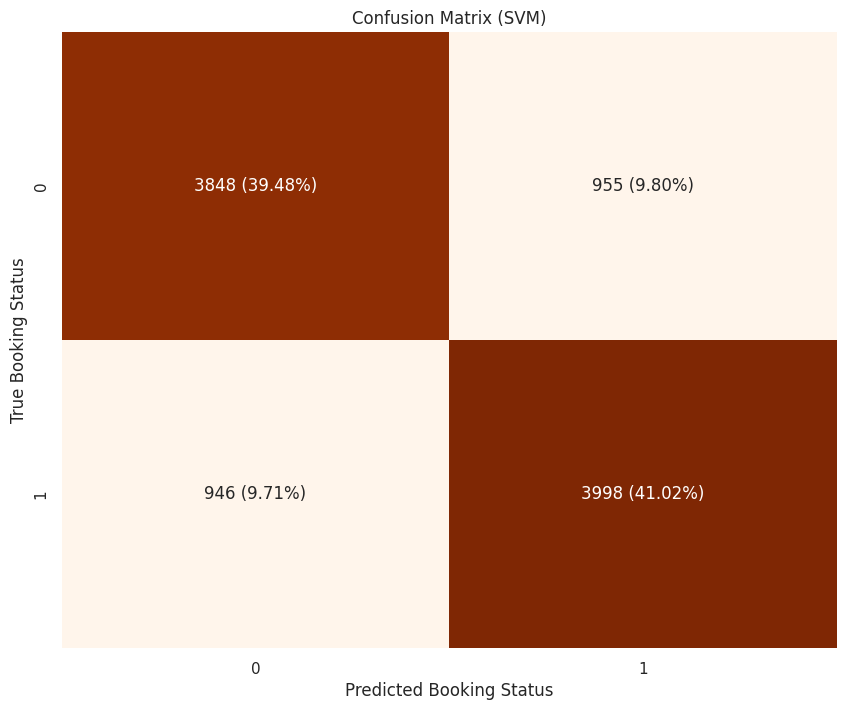

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Skalierung der Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modell erstellen und trainieren
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train_scaled, y_train)

# Modell evaluieren
y_pred = svm_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

# Berechnung der Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Berechnung der prozentualen Werte unter den absoluten Häufigkeiten jedes Quadranten
total_samples = np.sum(conf_matrix)
conf_matrix_percent = conf_matrix / total_samples * 100

# Erstellung der kombinierten Matrix
combined_matrix = np.empty((conf_matrix.shape[0], conf_matrix.shape[1]), dtype=object)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        combined_matrix[i][j] = f"{conf_matrix[i][j]} ({conf_matrix_percent[i][j]:.2f}%)"

# Visualisierung der Confusion Matrix als Heatmap mit absoluten Häufigkeiten und prozentualen Werten
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=combined_matrix, cmap='Oranges', fmt='', cbar=False)
plt.title('Confusion Matrix (SVM)')
plt.xlabel('Predicted Booking Status')
plt.ylabel('True Booking Status')
plt.savefig('confusionmatrix_SVM_upsampled.png', bbox_inches='tight')
plt.show()


              precision    recall  f1-score   support

           0       0.80      0.84      0.82      4803
           1       0.84      0.79      0.81      4944

    accuracy                           0.82      9747
   macro avg       0.82      0.82      0.82      9747
weighted avg       0.82      0.82      0.82      9747



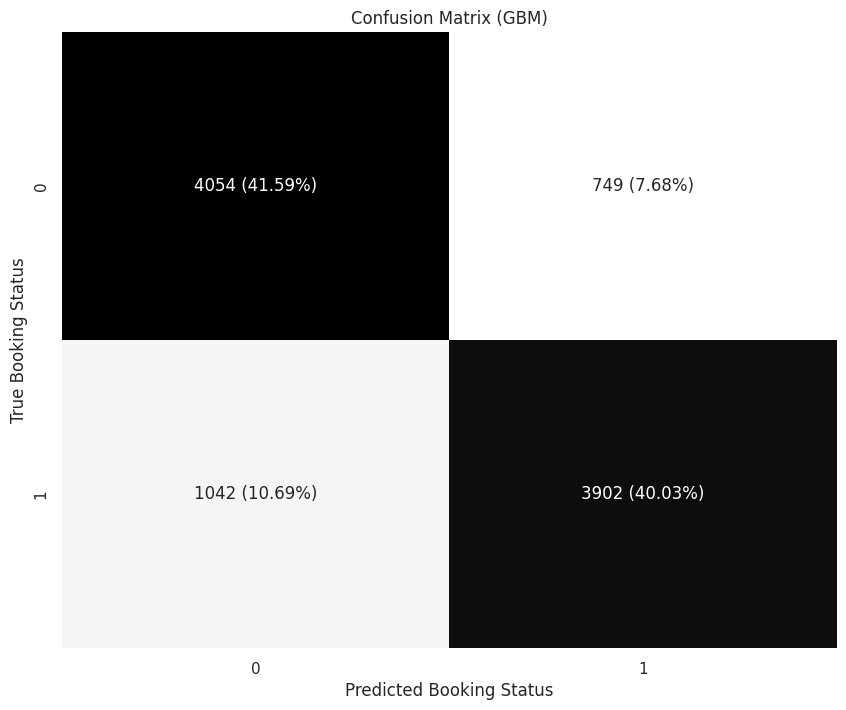

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Modell erstellen und trainieren
gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
gbm_model.fit(X_train, y_train)

# Modell evaluieren
y_pred = gbm_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Berechnung der Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Berechnung der prozentualen Werte unter den absoluten Häufigkeiten jedes Quadranten
total_samples = np.sum(conf_matrix)
conf_matrix_percent = conf_matrix / total_samples * 100

# Erstellung der kombinierten Matrix
combined_matrix = np.empty((conf_matrix.shape[0], conf_matrix.shape[1]), dtype=object)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        combined_matrix[i][j] = f"{conf_matrix[i][j]} ({conf_matrix_percent[i][j]:.2f}%)"

# Visualisierung der Confusion Matrix als Heatmap mit absoluten Häufigkeiten und prozentualen Werten
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=combined_matrix, cmap='Greys', fmt='', cbar=False)
plt.title('Confusion Matrix (GBM)')
plt.xlabel('Predicted Booking Status')
plt.ylabel('True Booking Status')
plt.savefig('confusionmatrix_GBM_upsampled.png', bbox_inches='tight')
plt.show()


              precision    recall  f1-score   support

           0       0.95      0.91      0.93      4803
           1       0.92      0.95      0.93      4944

    accuracy                           0.93      9747
   macro avg       0.93      0.93      0.93      9747
weighted avg       0.93      0.93      0.93      9747

Mean Absolute Error (MAE): 0.06781573817584897


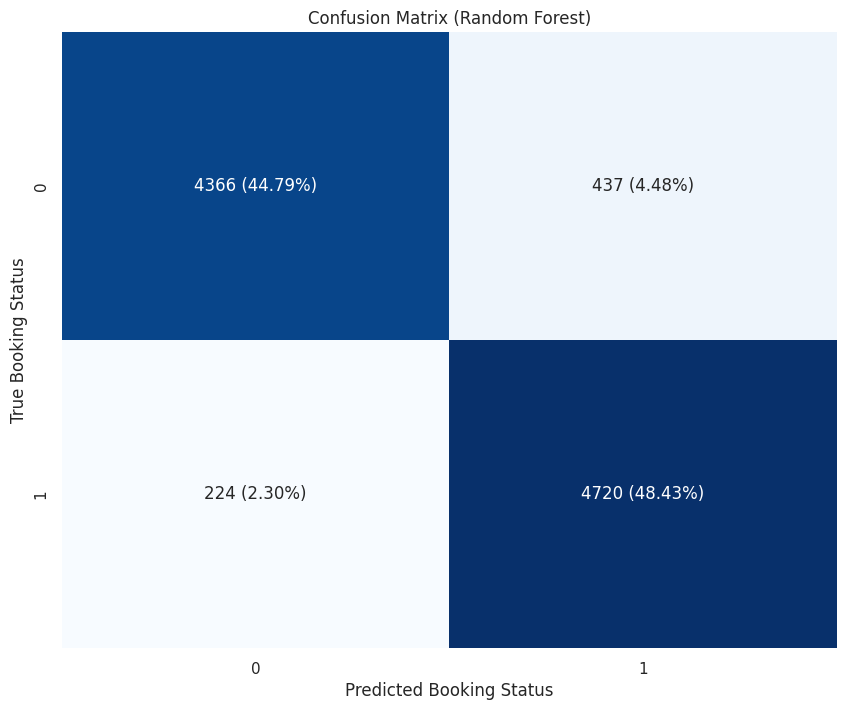

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error

# Initialisierung und Training des Random Forest-Modells
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Vorhersage auf den Testdaten
y_pred = rf_model.predict(X_test)

# Bewertung des Modells
print(classification_report(y_test, y_pred))

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Berechnung der Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Berechnung der prozentualen Werte unter den absoluten Häufigkeiten jedes Quadranten
total_samples = np.sum(conf_matrix)
conf_matrix_percent = conf_matrix / total_samples * 100

# Erstellung der kombinierten Matrix
combined_matrix = np.empty((conf_matrix.shape[0], conf_matrix.shape[1]), dtype=object)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        combined_matrix[i][j] = f"{conf_matrix[i][j]} ({conf_matrix_percent[i][j]:.2f}%)"

# Visualisierung der Confusion Matrix als Heatmap mit absoluten Häufigkeiten und prozentualen Werten
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=combined_matrix, cmap='Blues', fmt='', cbar=False)
plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted Booking Status')
plt.ylabel('True Booking Status')
plt.savefig('confusionmatrix_RandomForest_upsampled.png', bbox_inches='tight')
plt.show()
